In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
experiments = {}

for subject in range(1, 12):
    for subtask in range (1, 3):
        for trial in range(1, 6): 
            name = f"task2_results/subject_{subject}_subtask_{subtask}_trial{trial}.csv" 
            category = (subject, subtask, trial)  
            experiments[category] = pd.read_csv(name, encoding="latin")


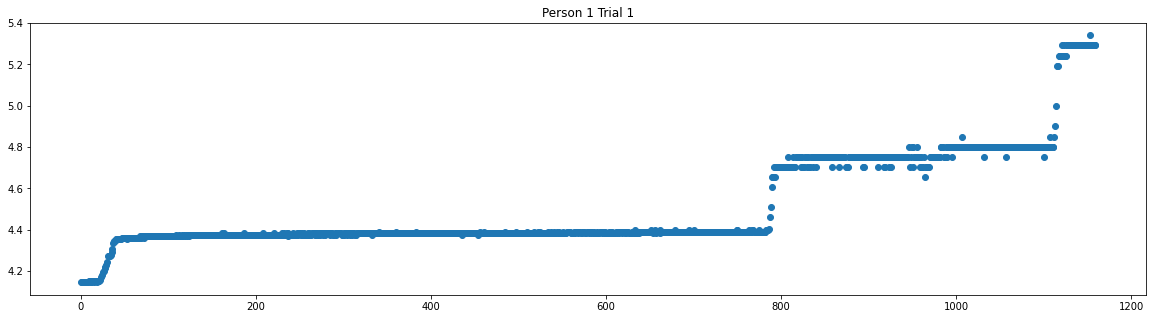

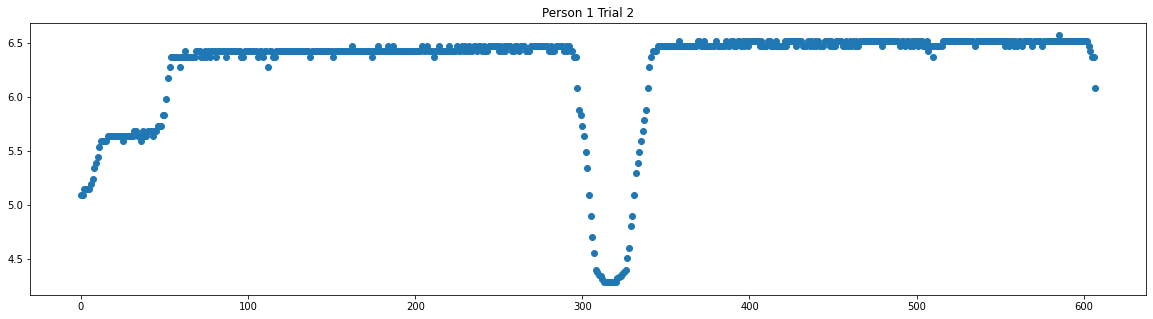

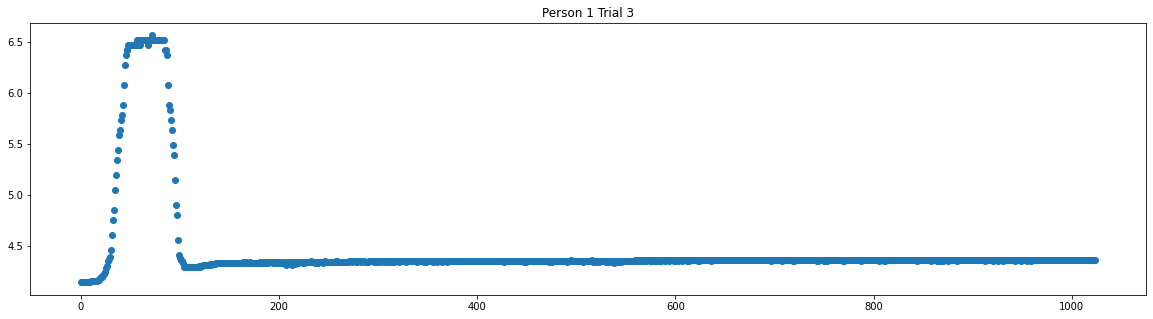

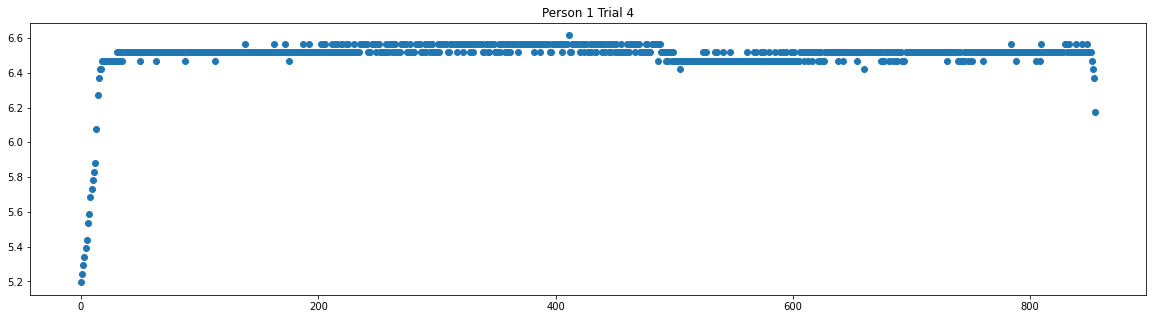

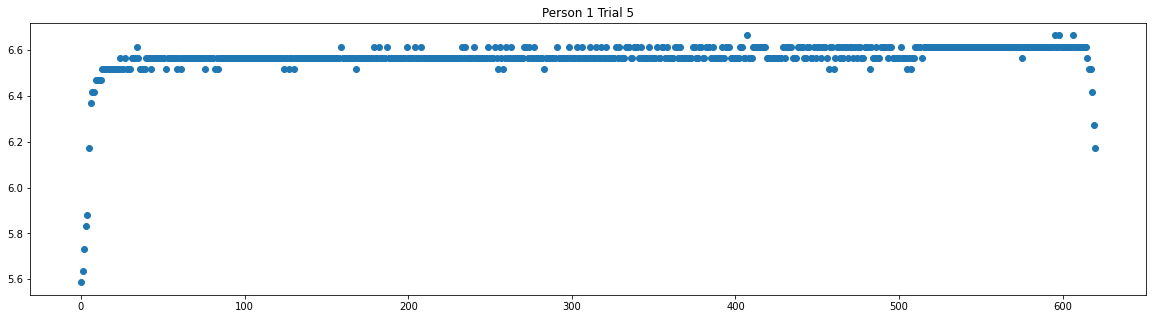

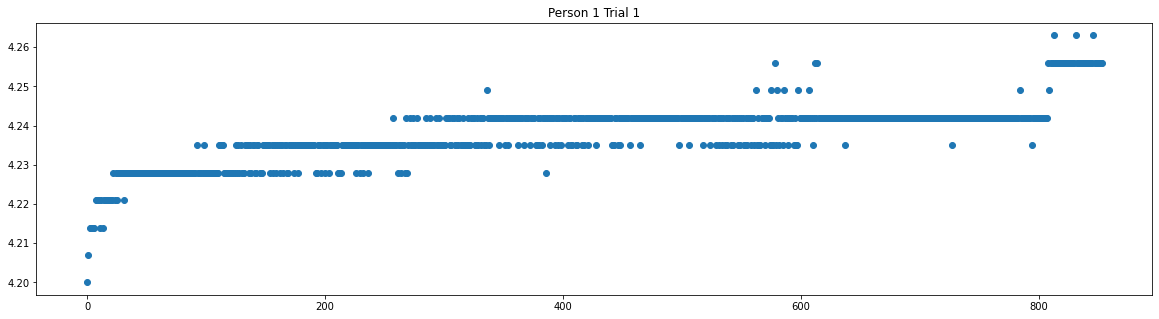

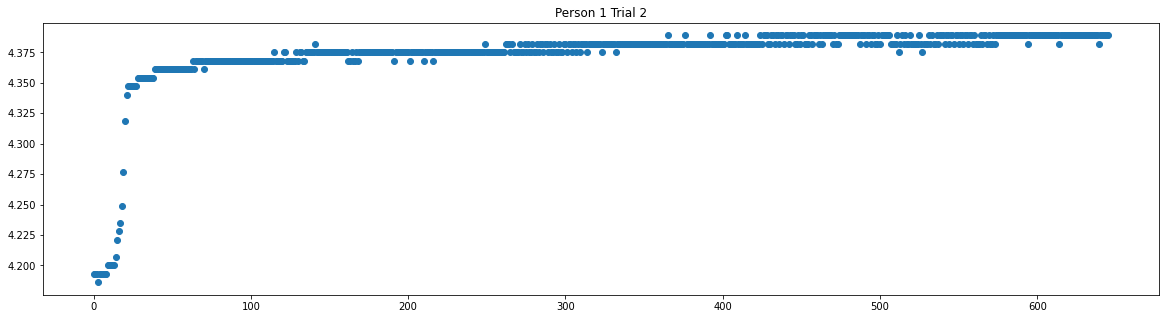

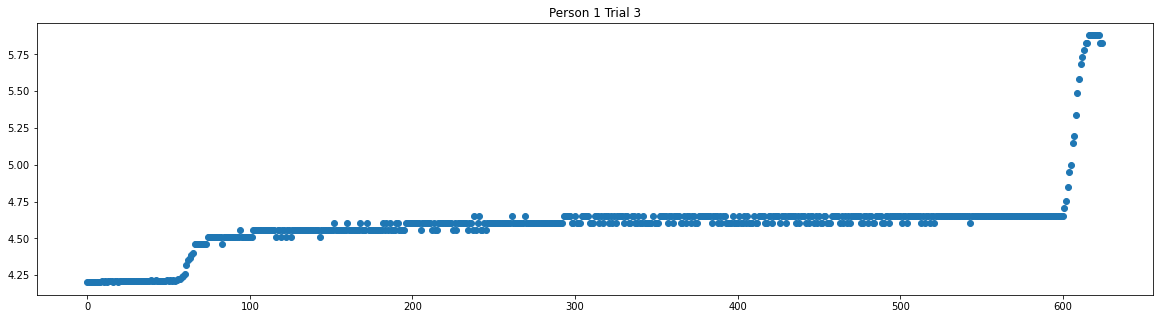

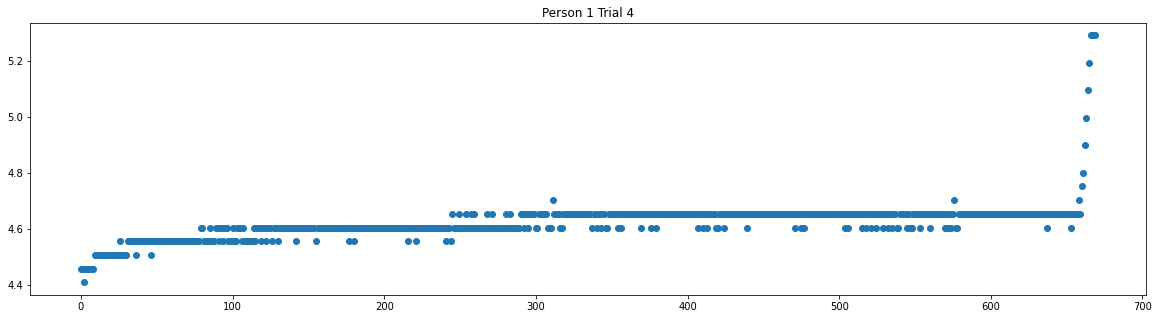

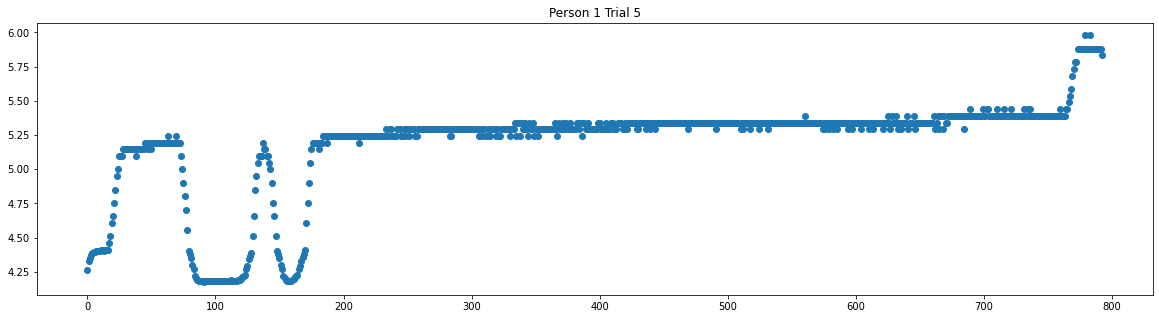

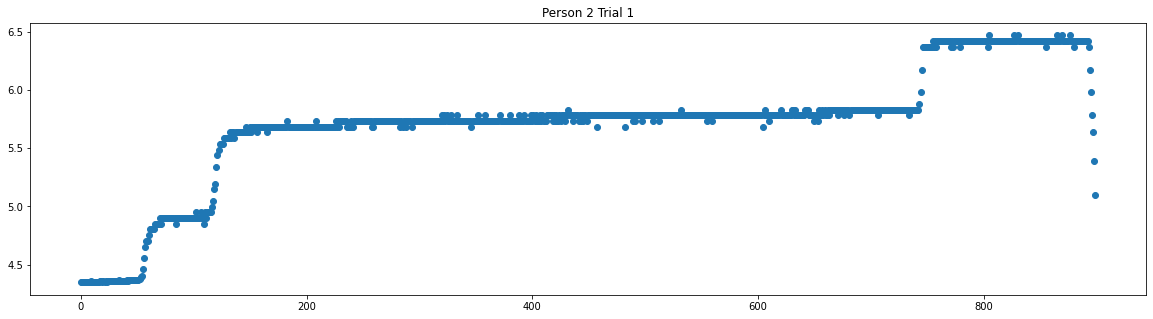

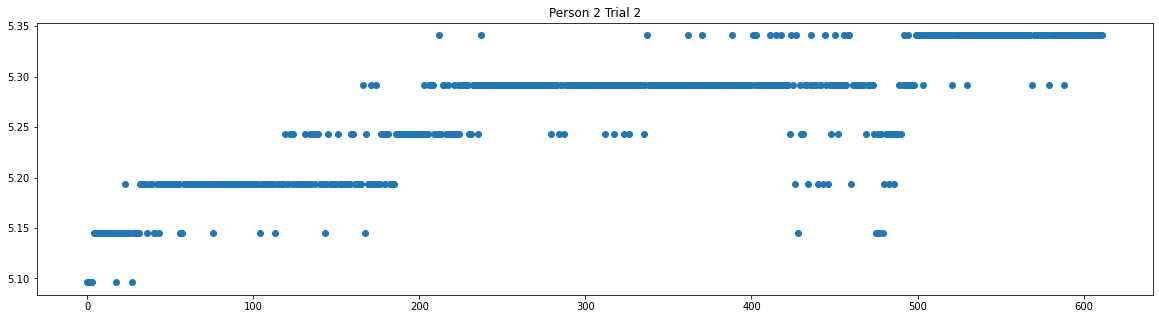

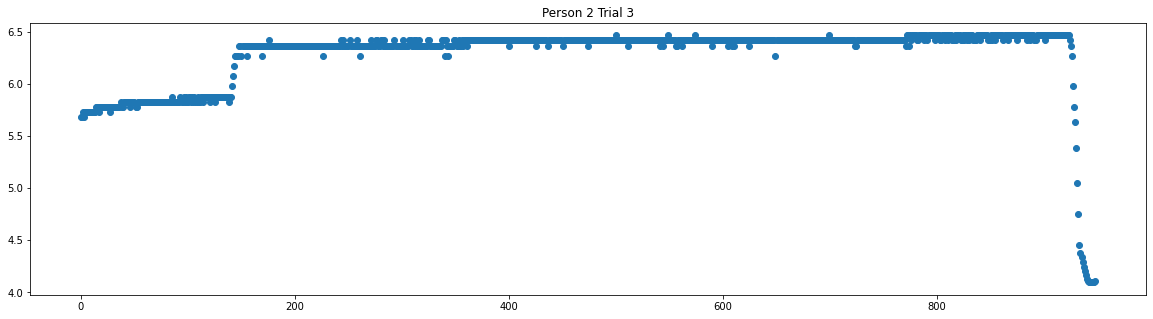

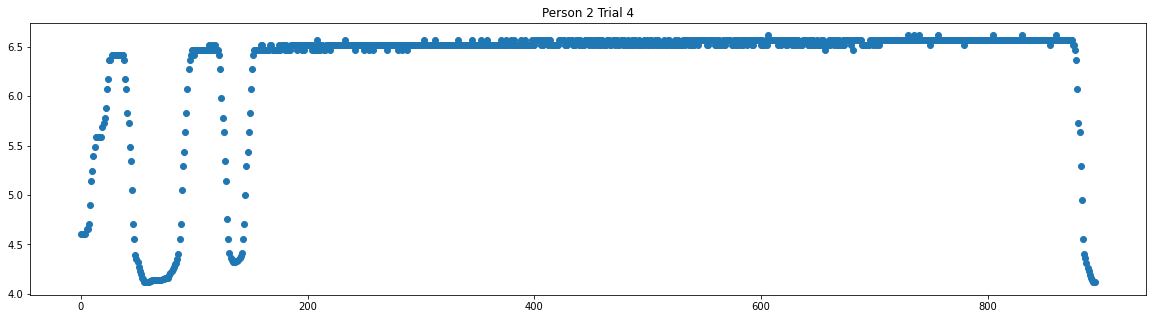

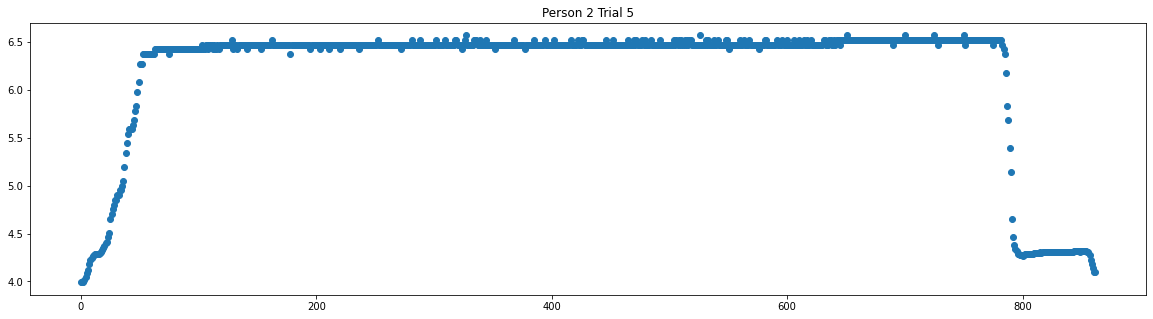

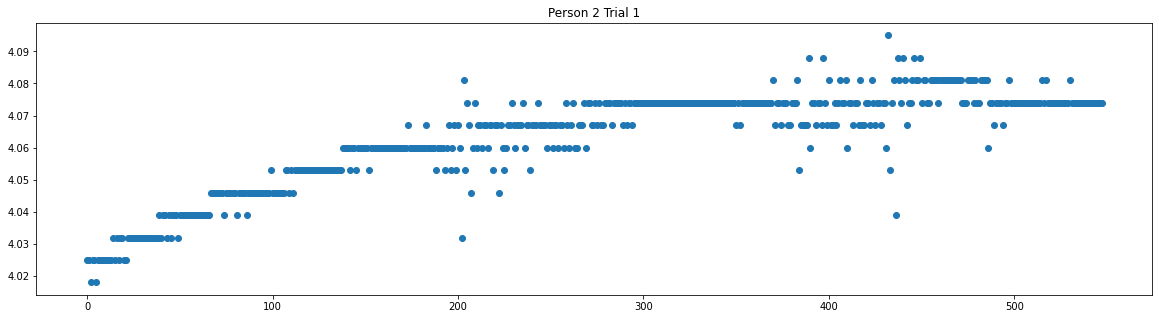

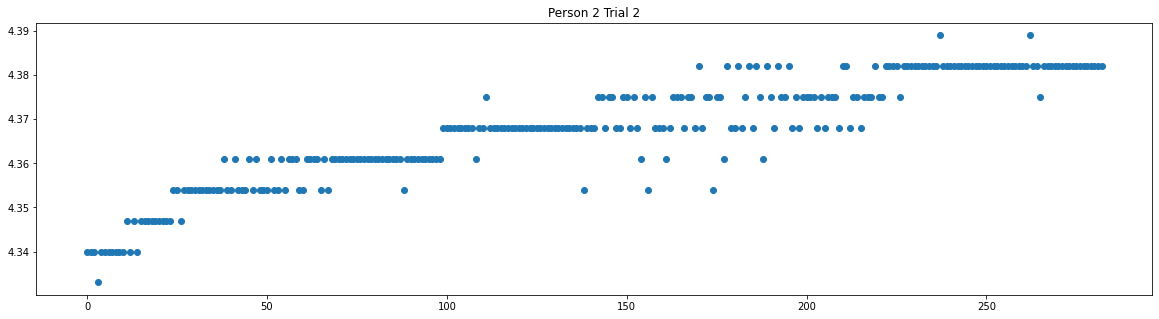

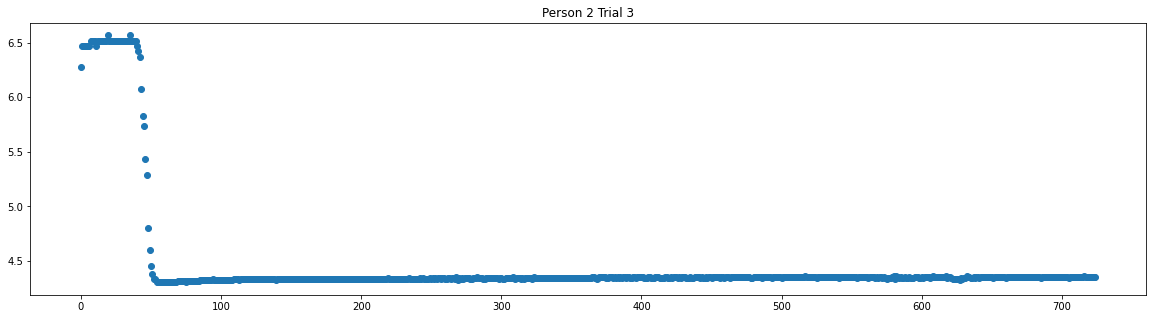

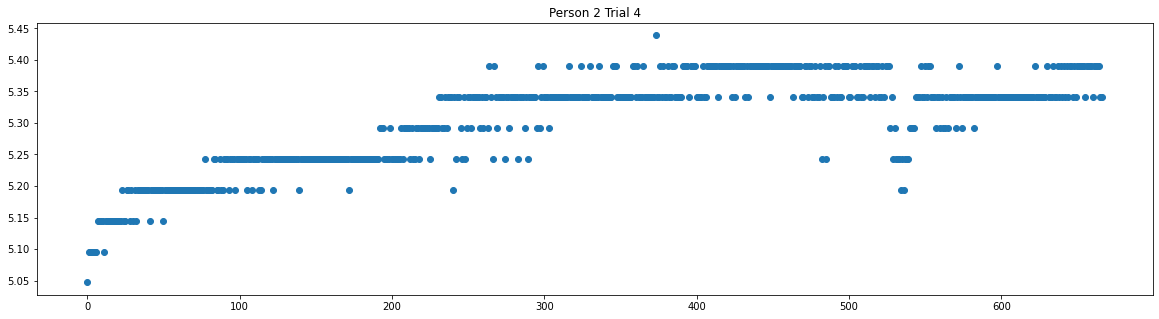

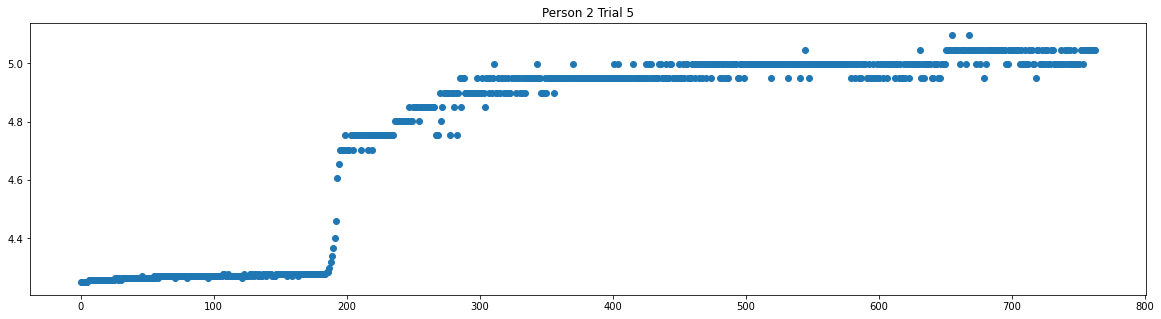

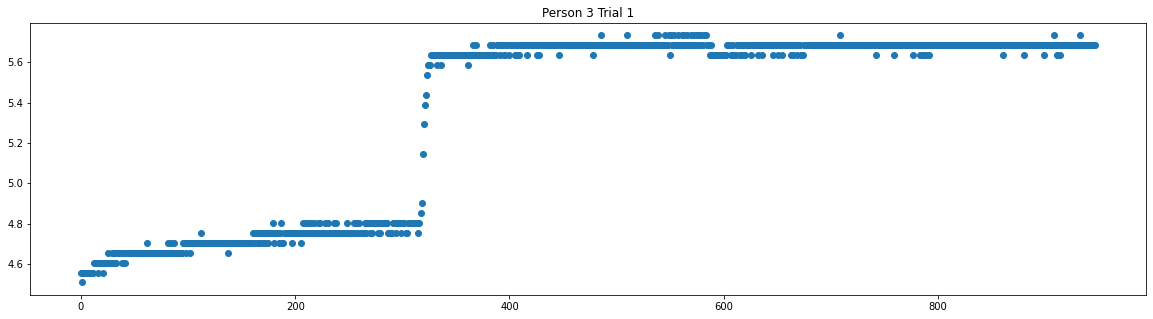

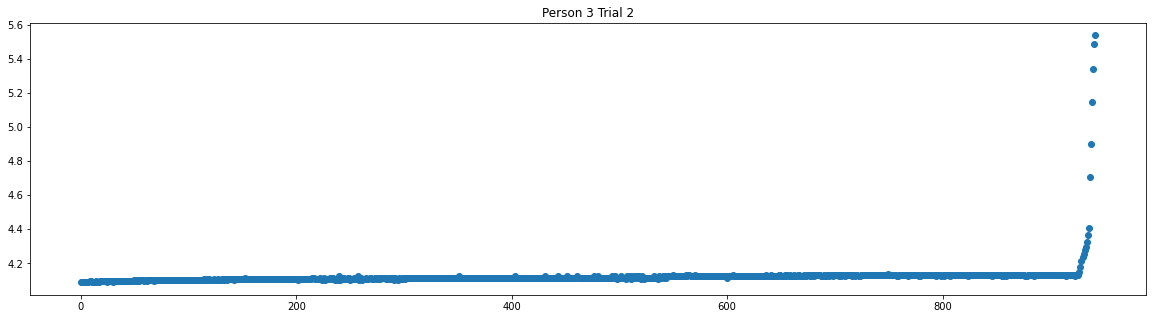

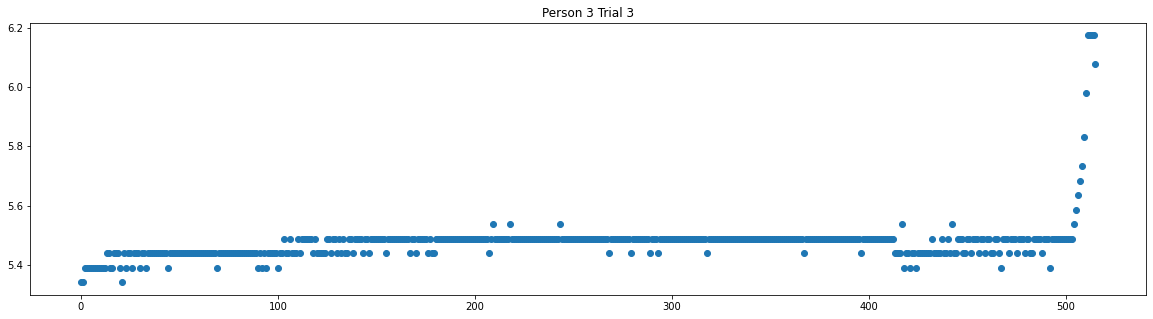

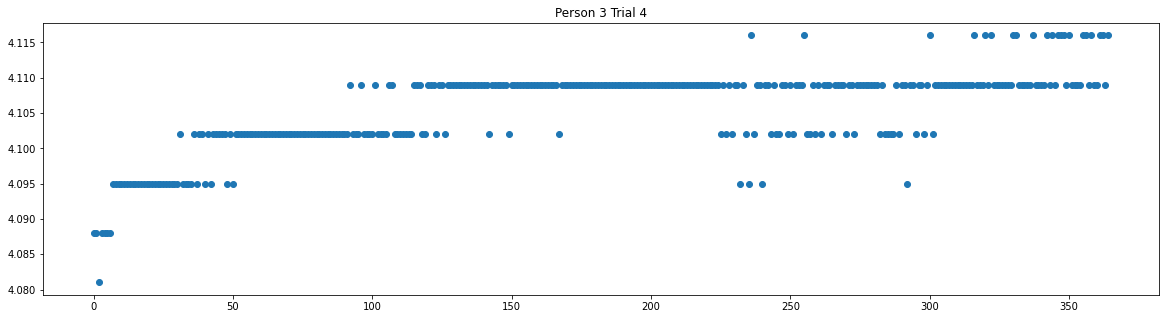

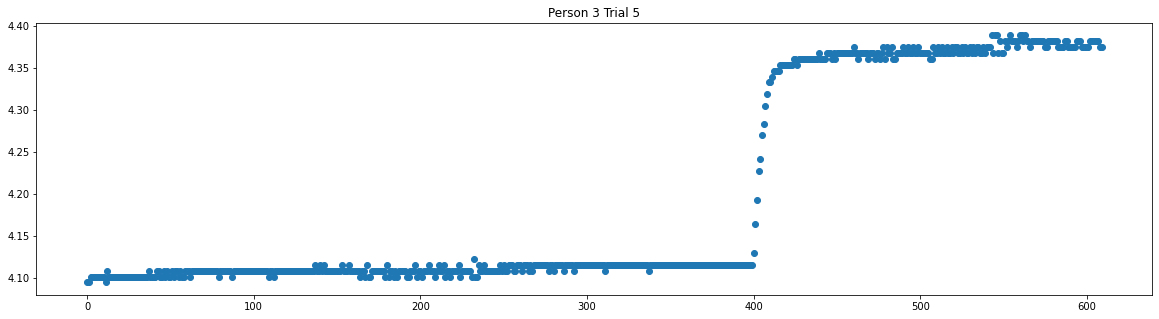

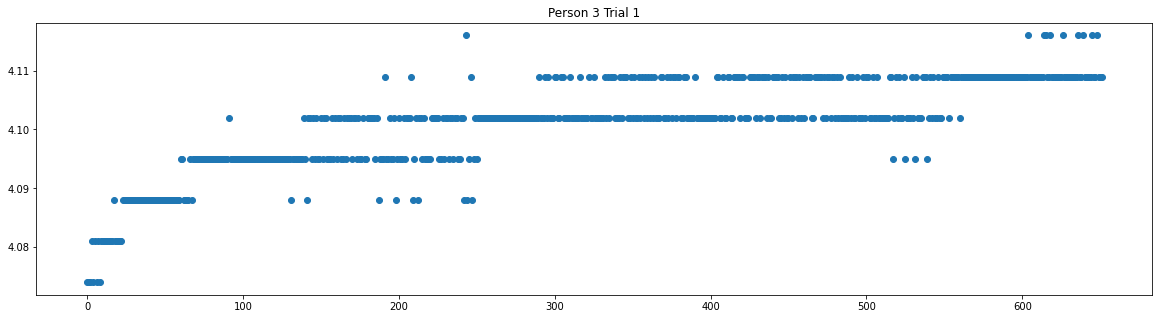

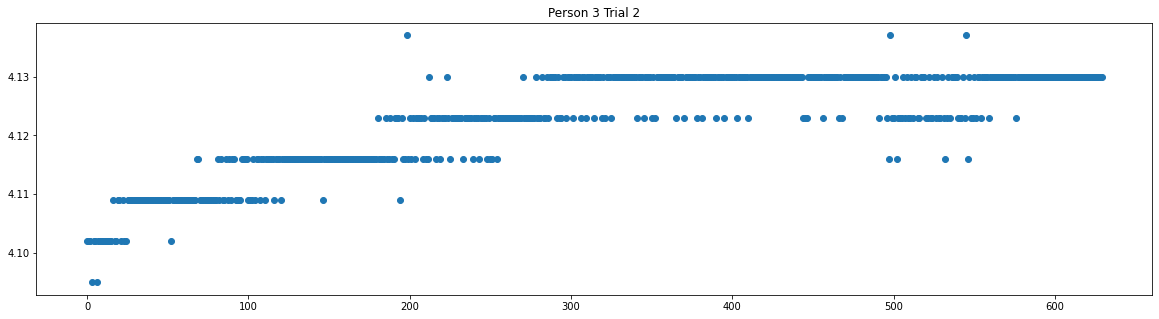

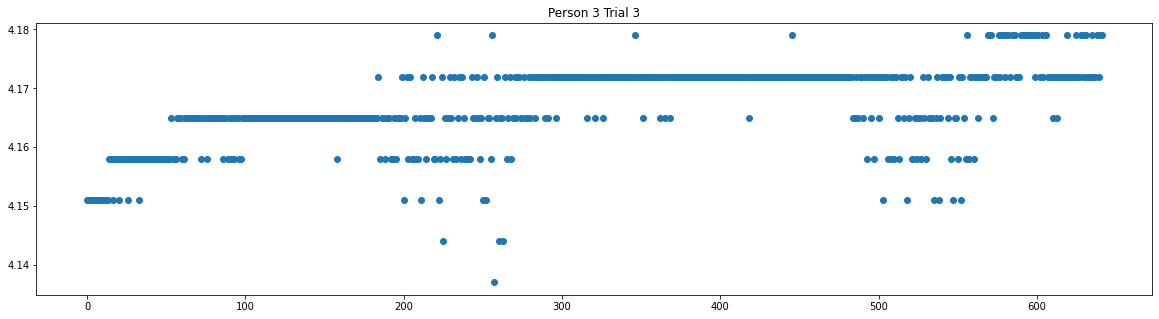

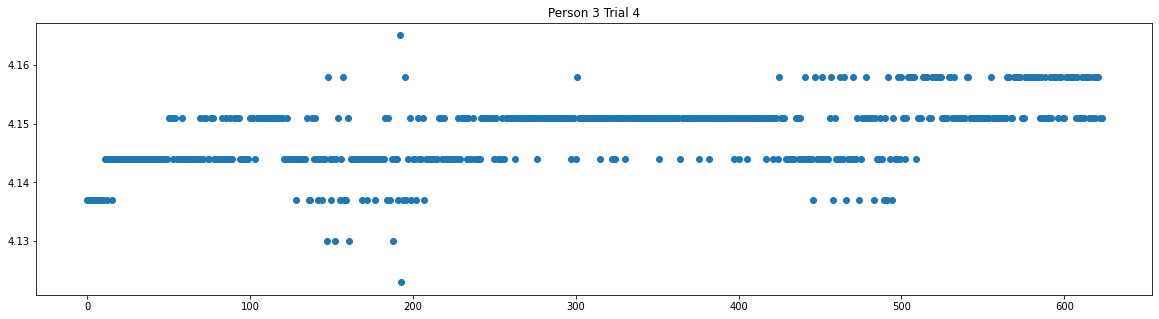

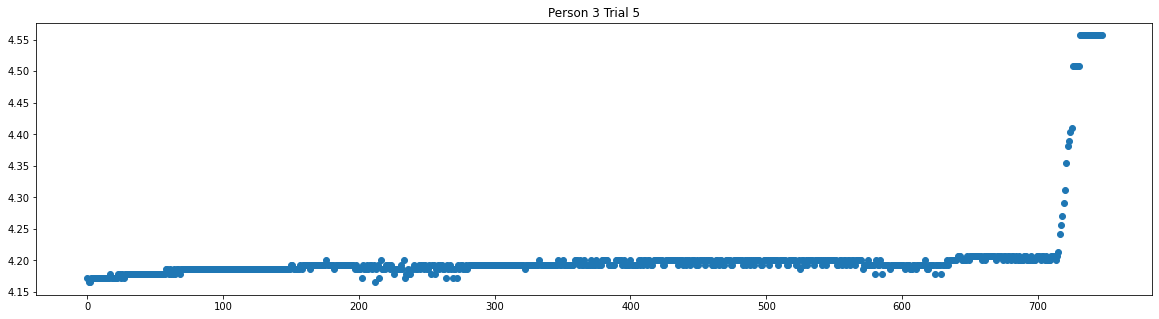

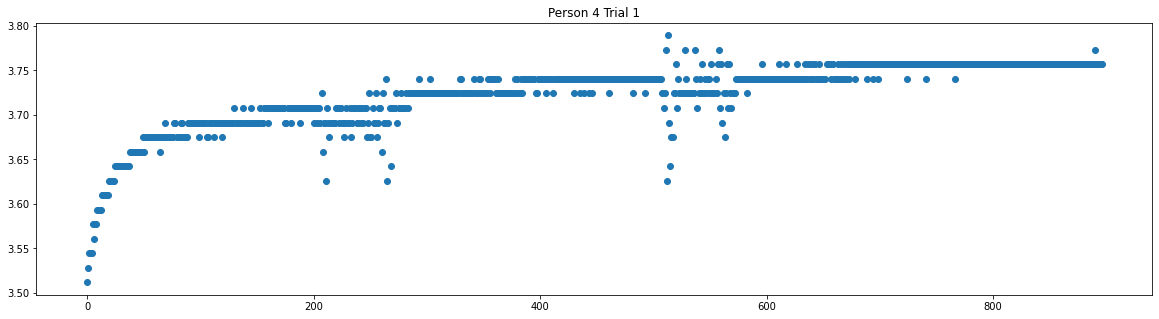

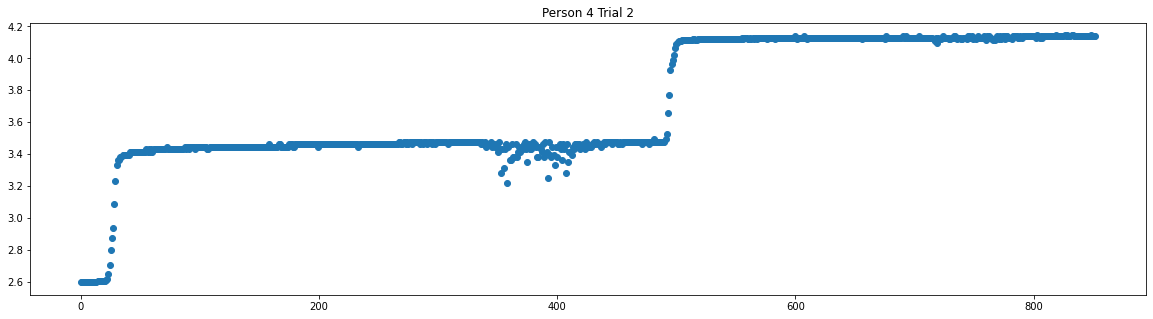

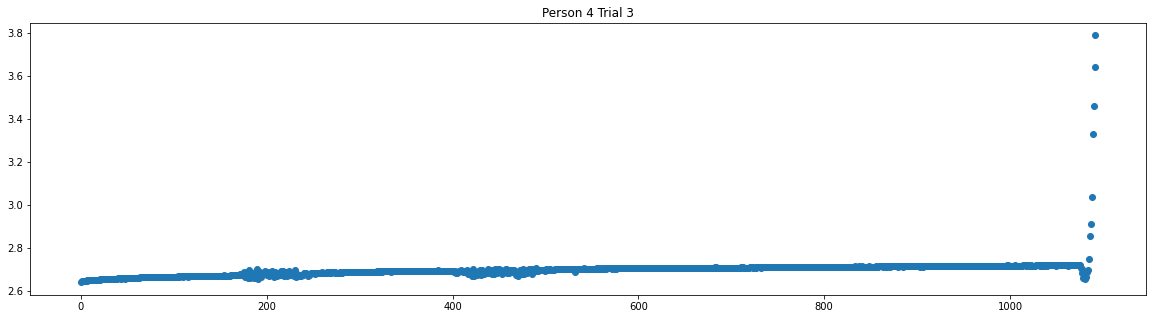

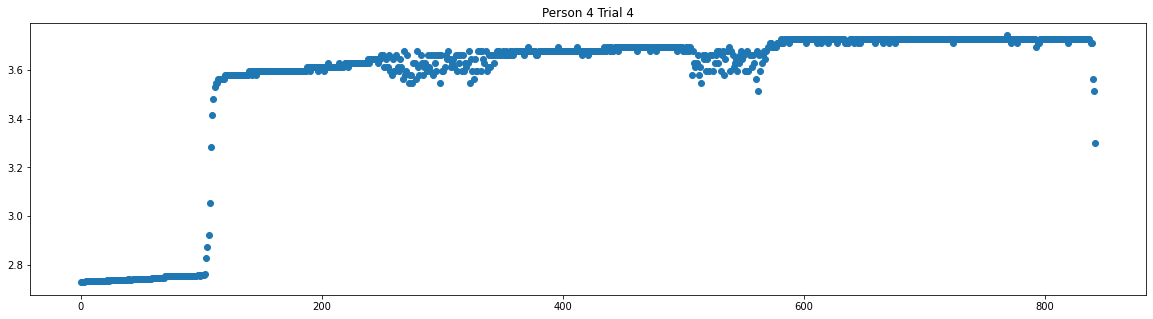

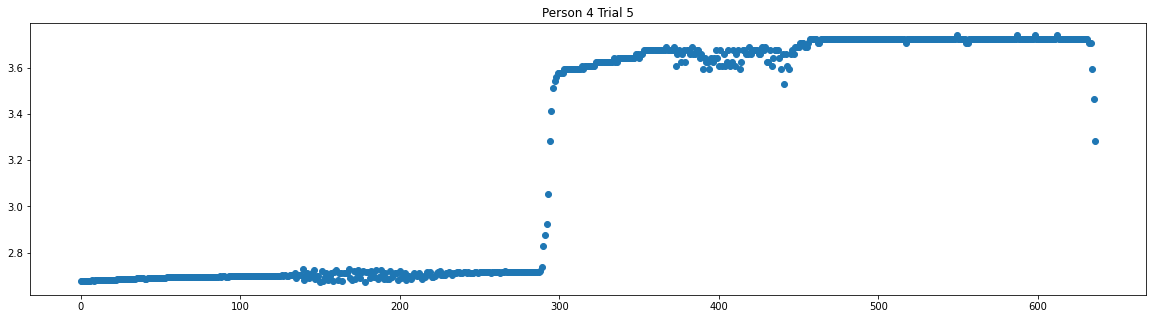

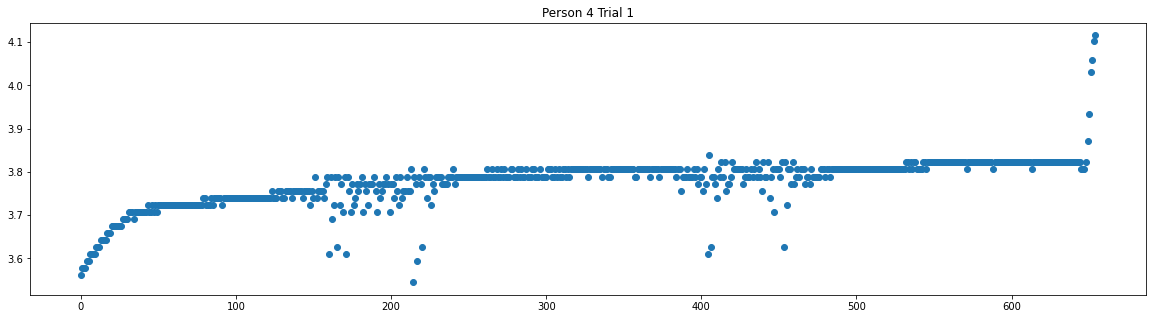

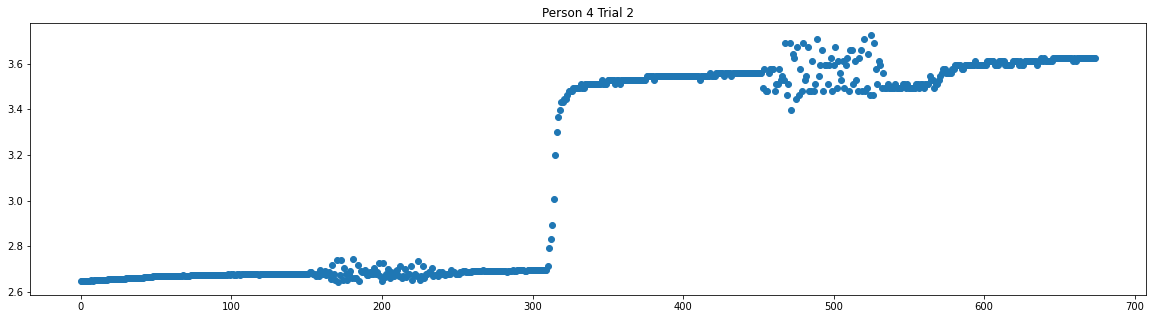

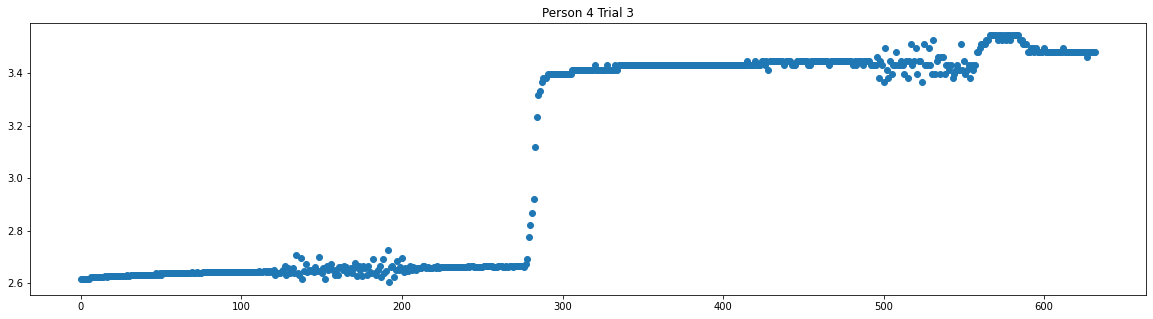

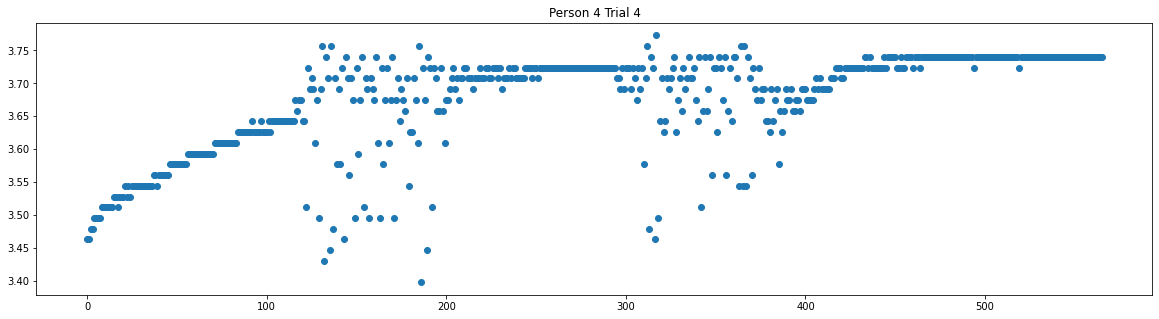

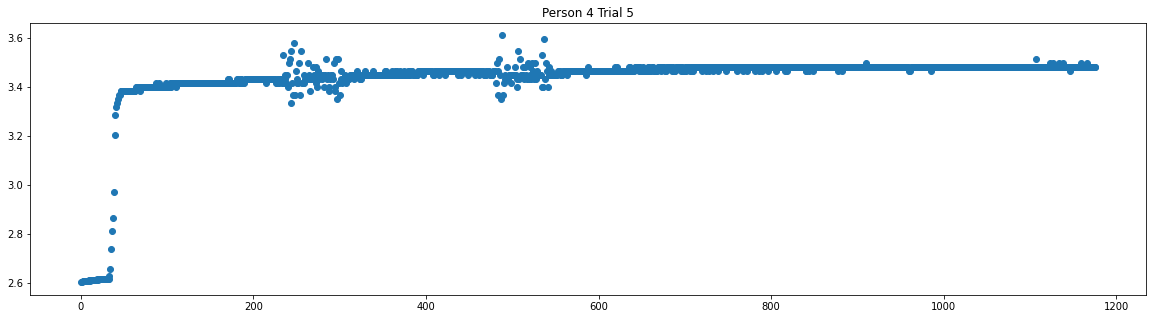

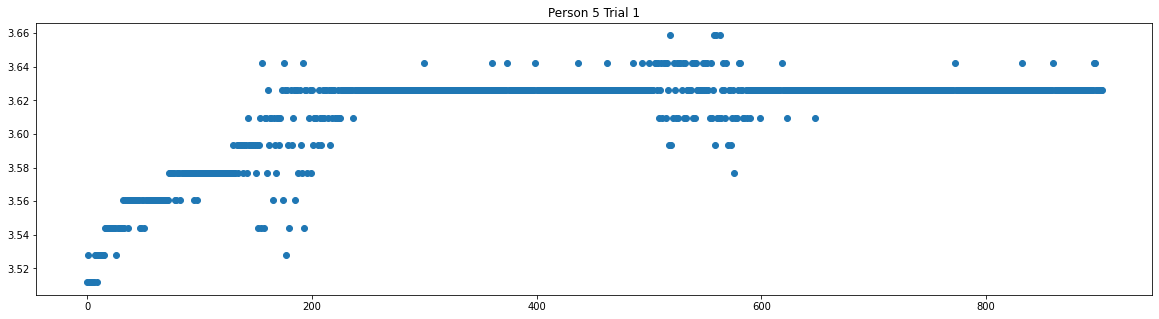

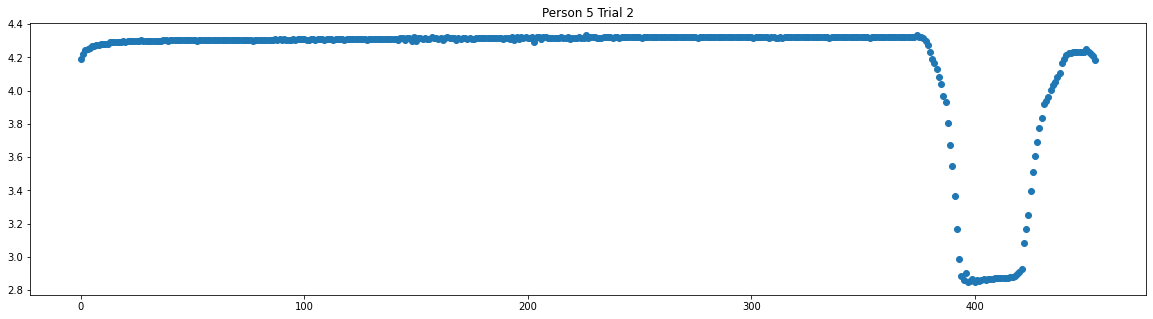

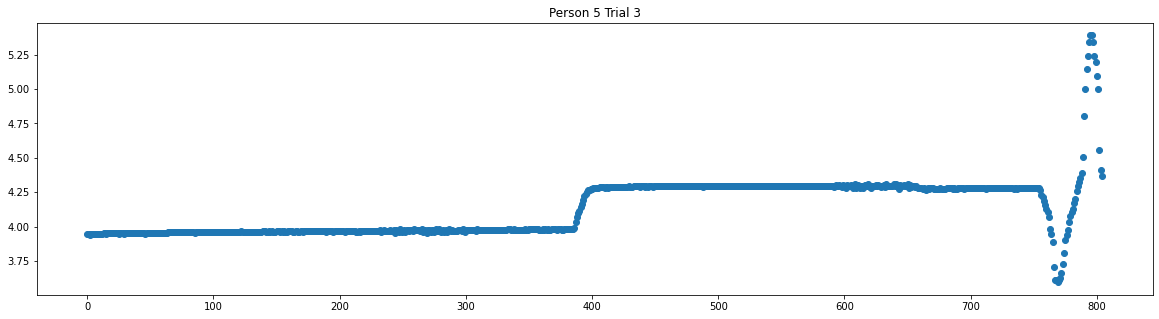

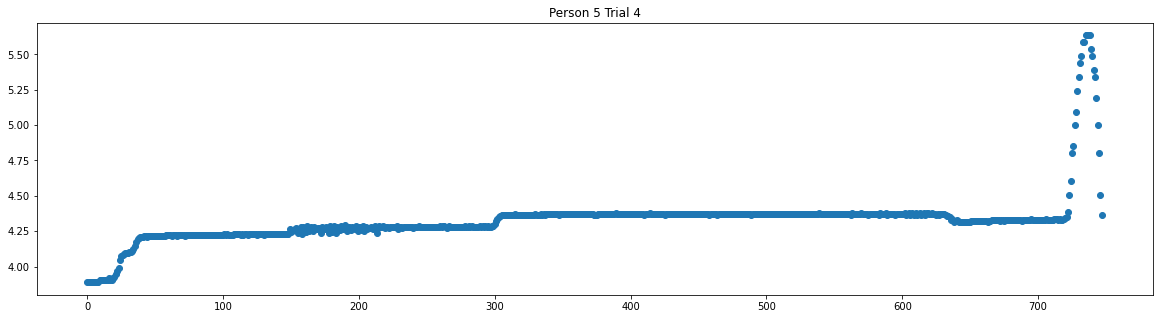

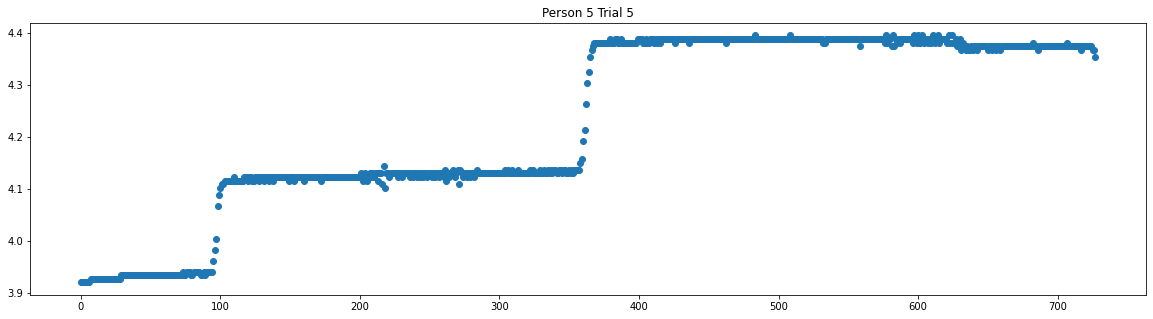

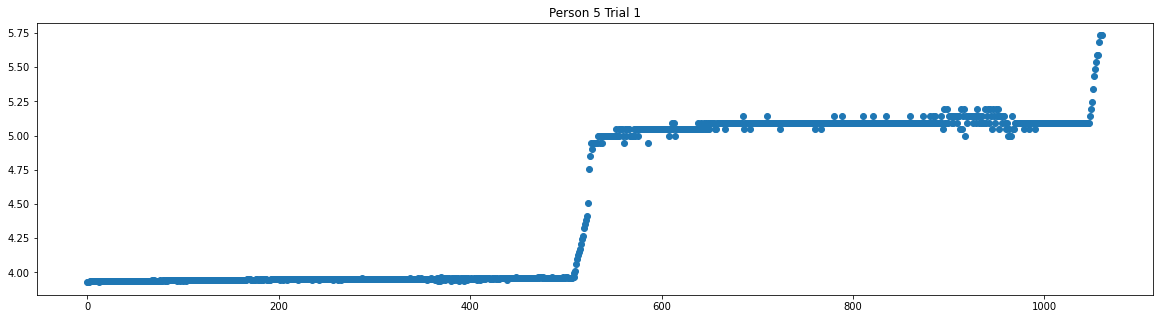

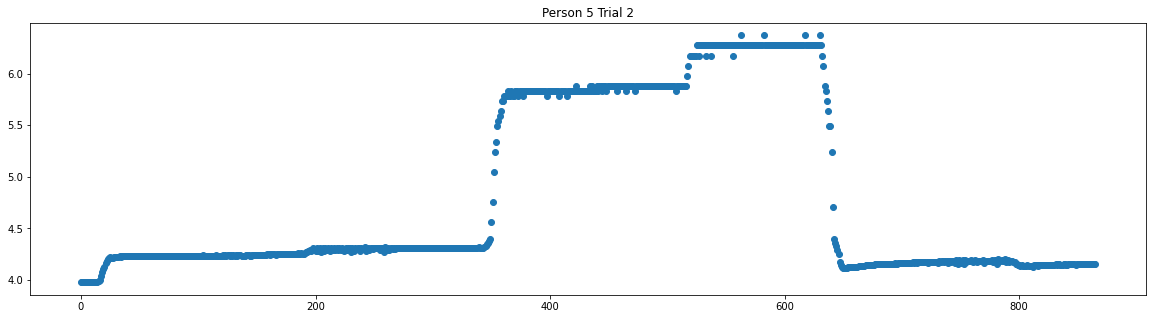

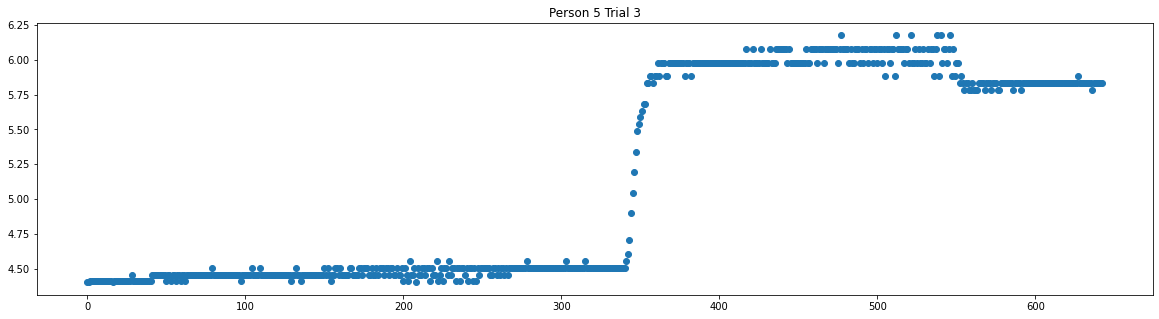

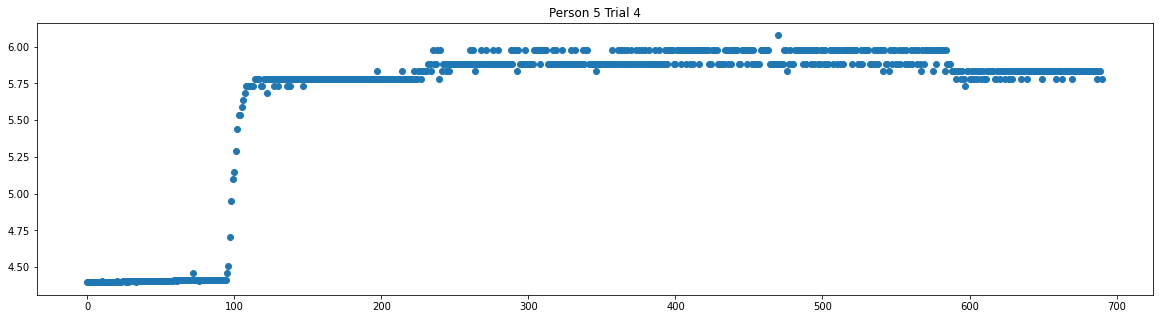

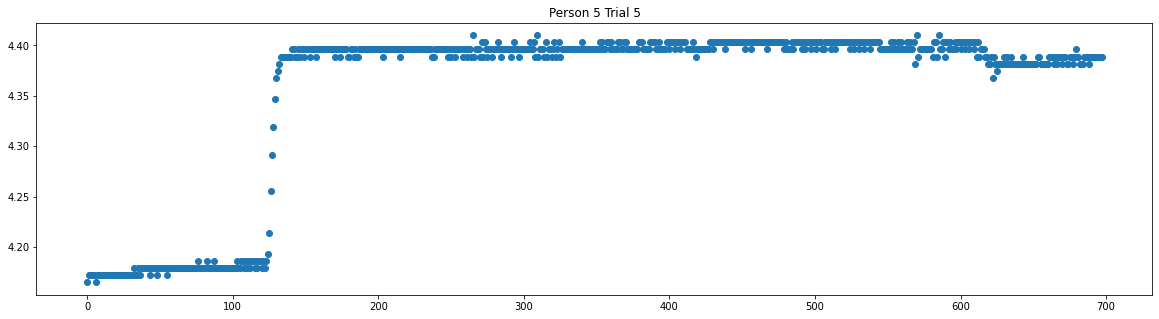

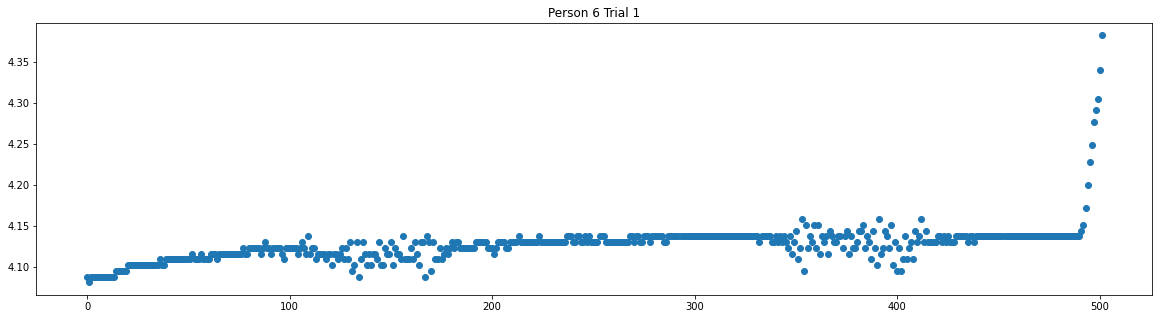

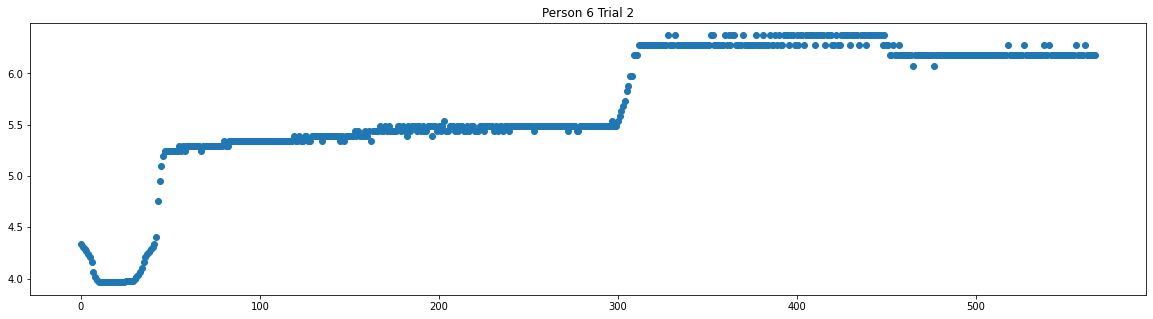

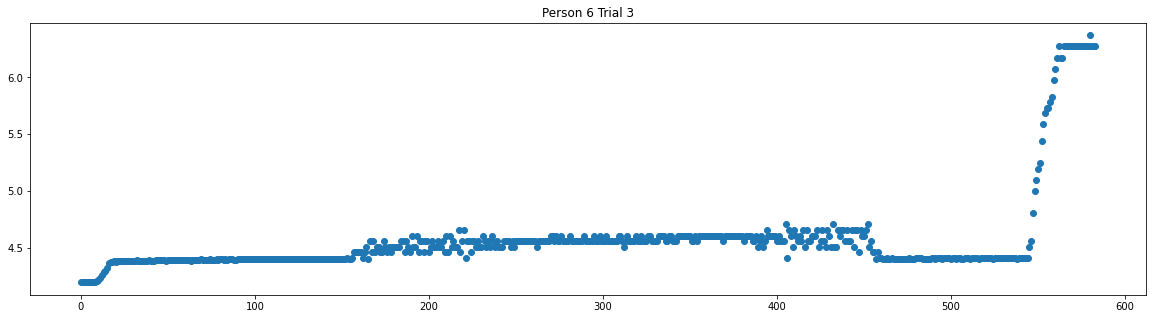

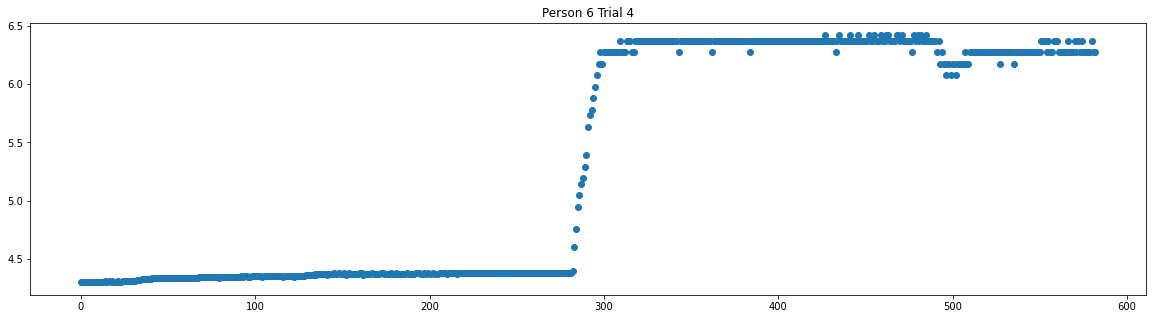

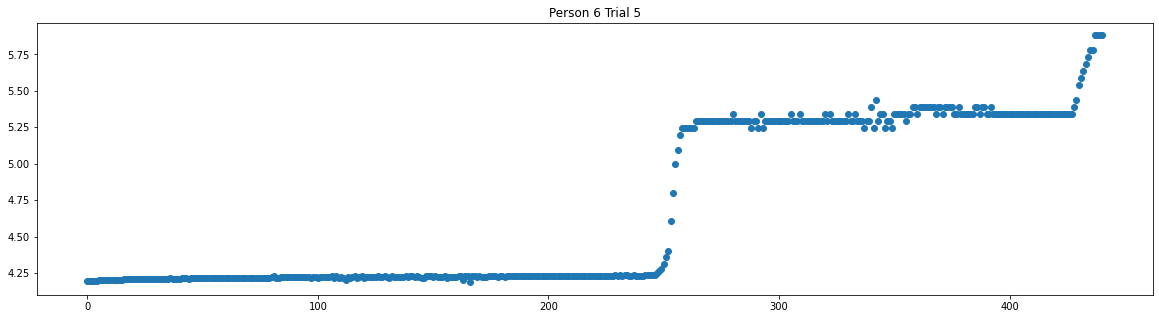

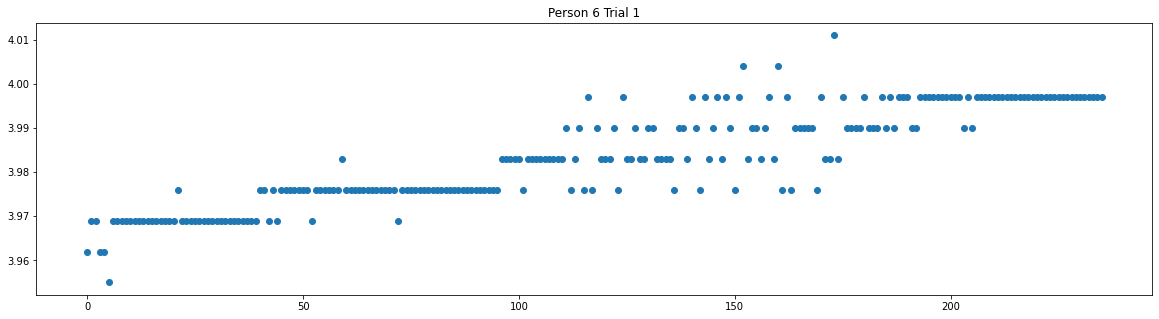

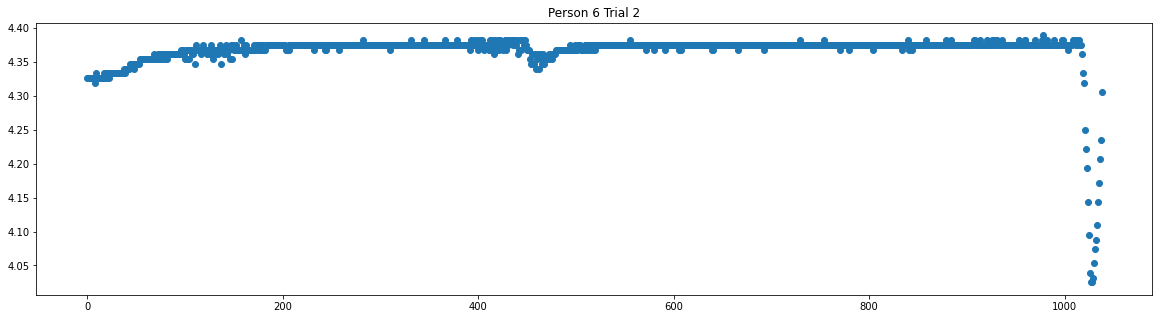

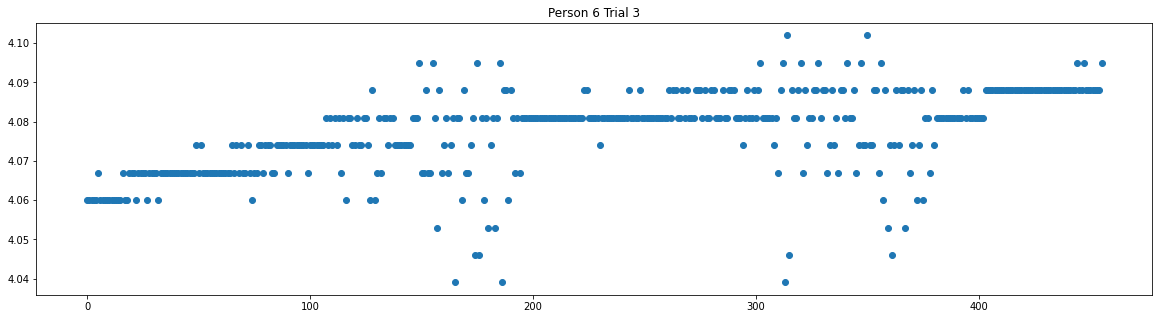

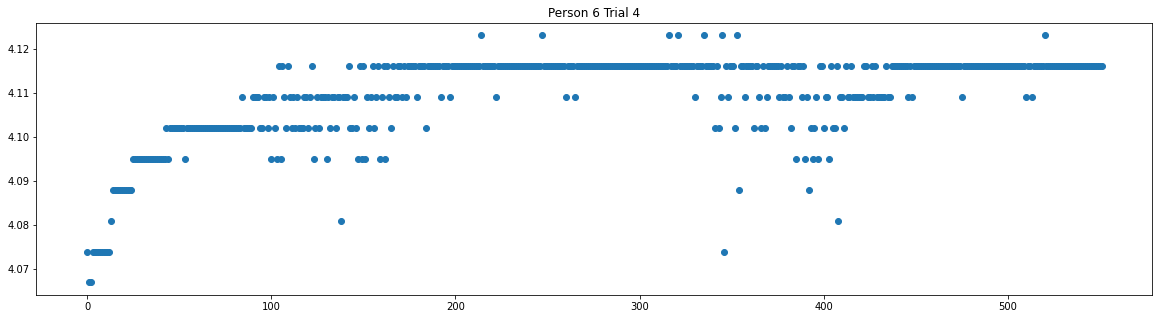

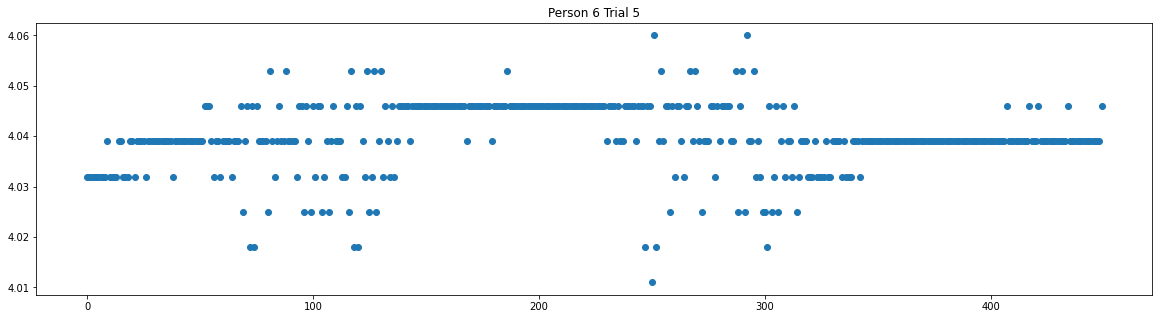

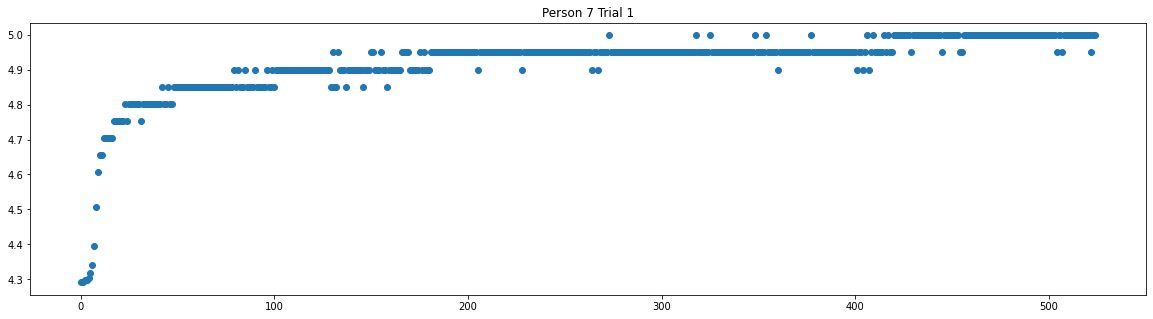

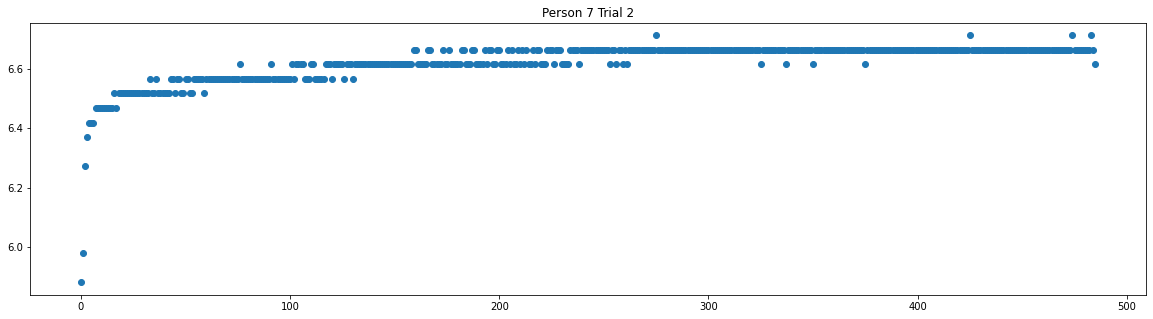

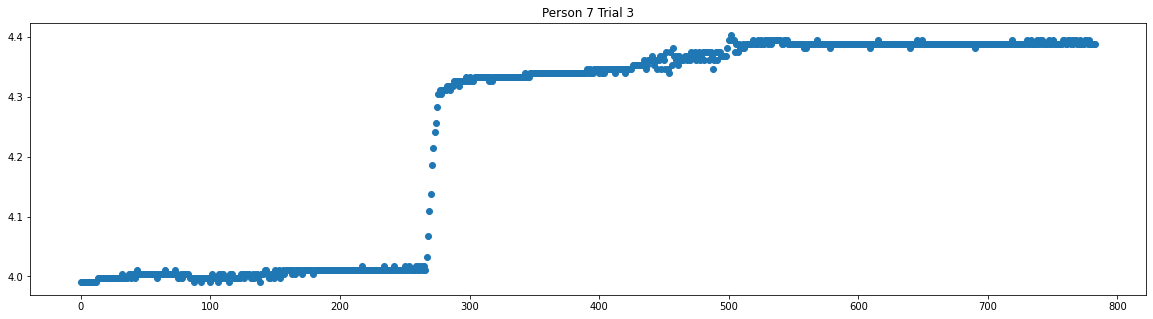

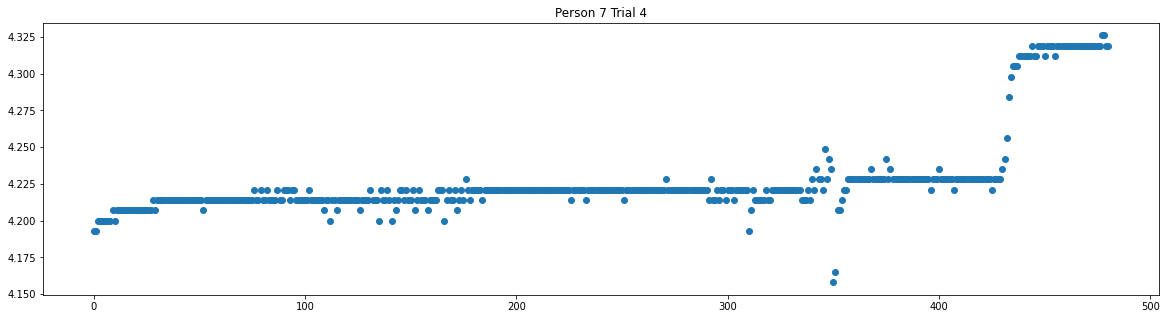

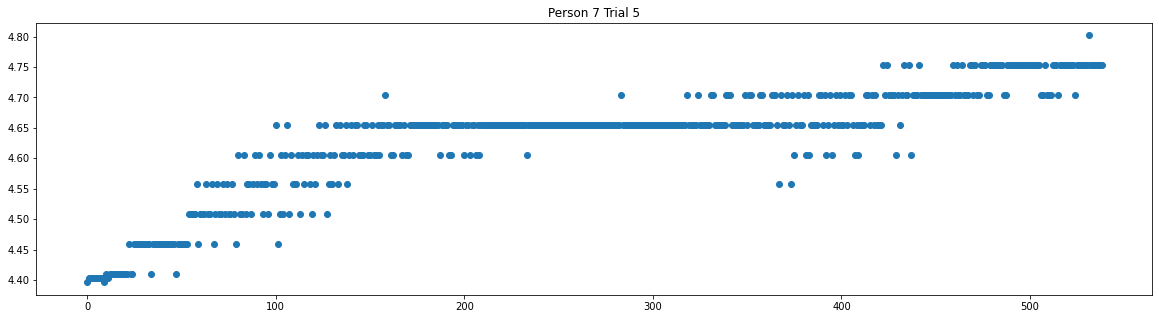

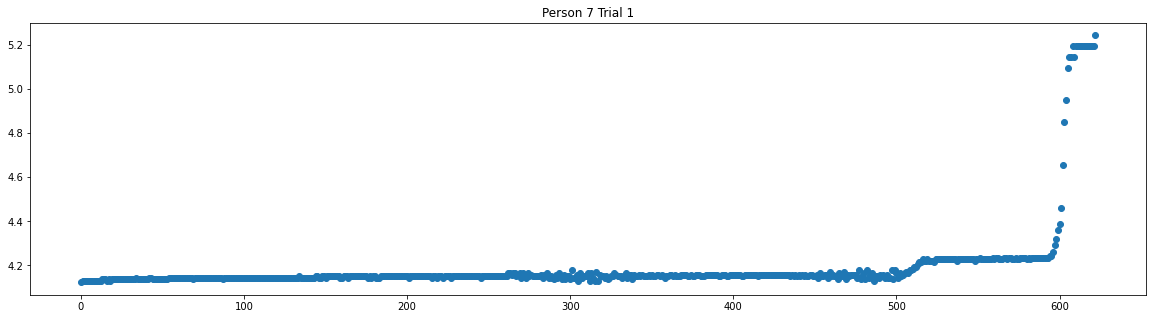

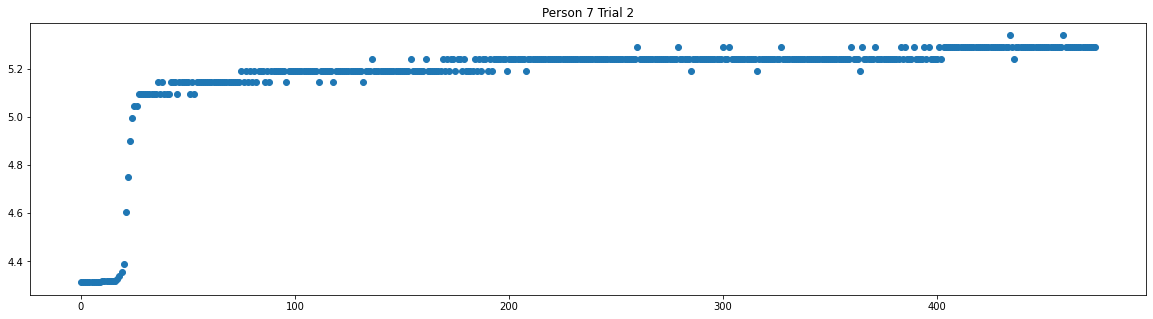

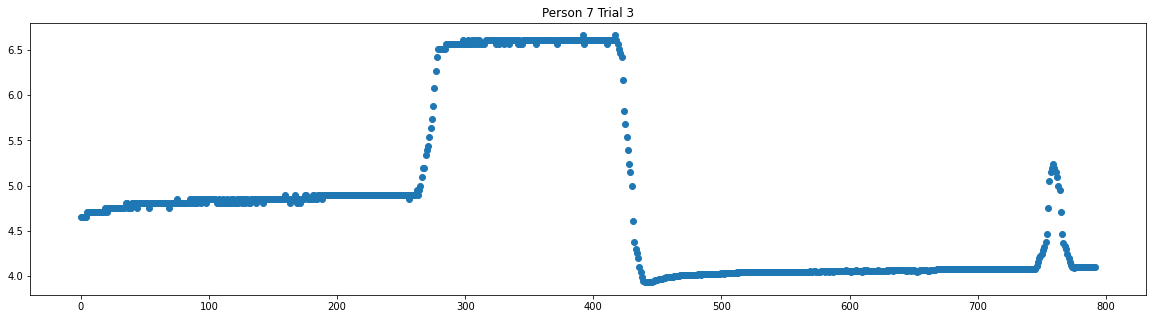

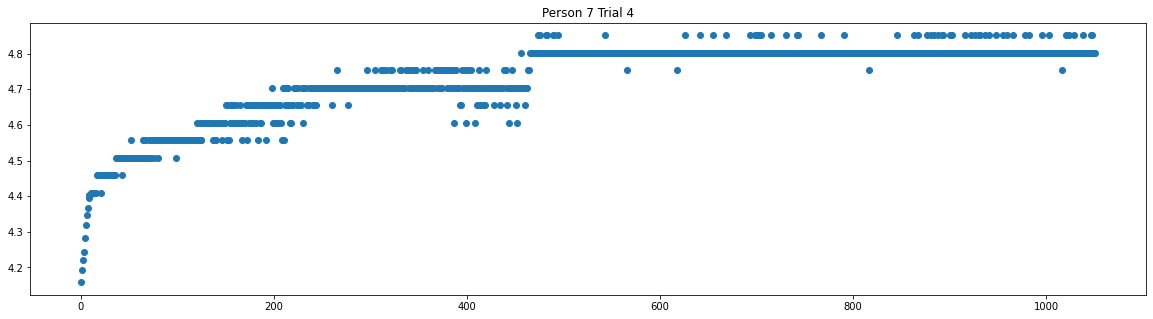

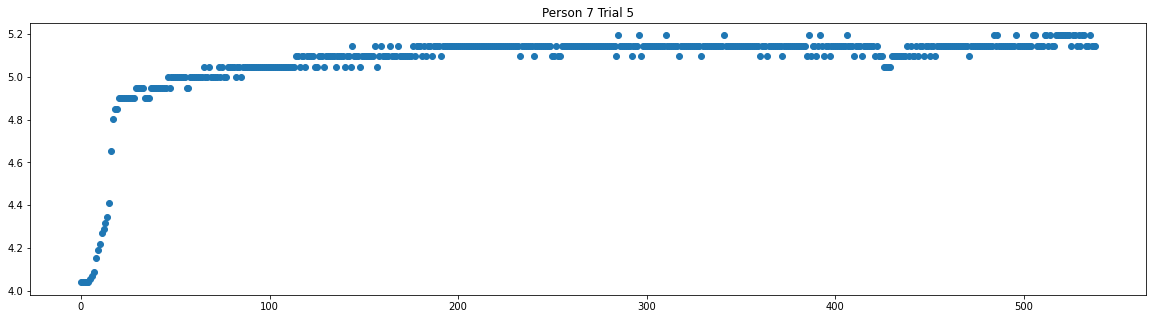

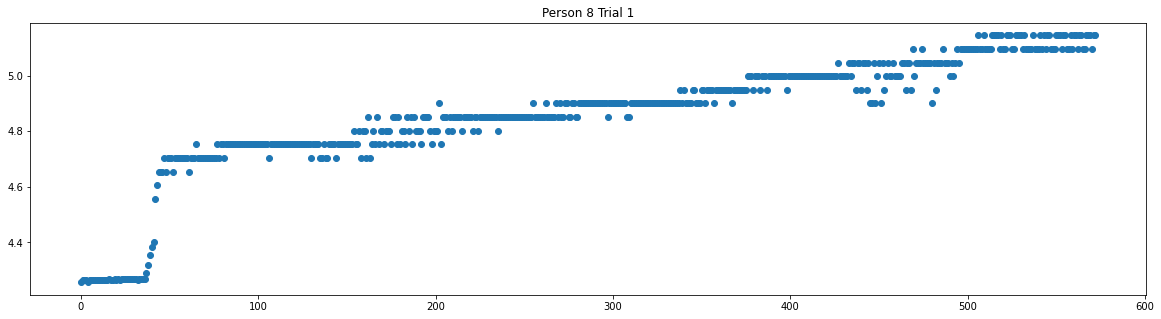

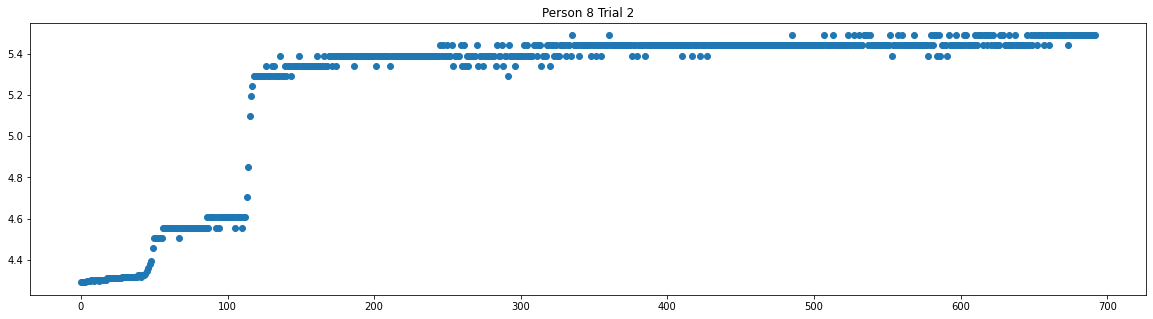

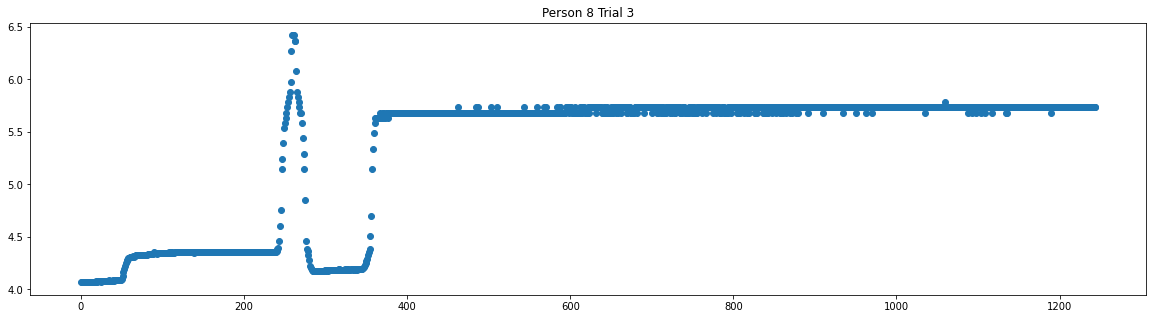

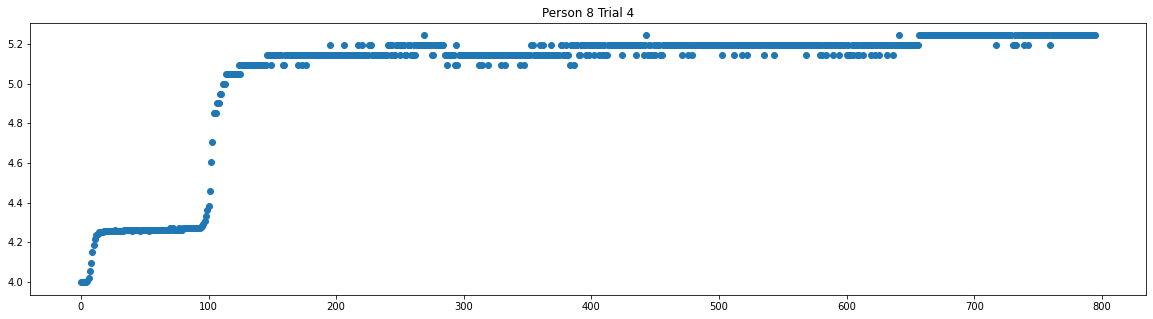

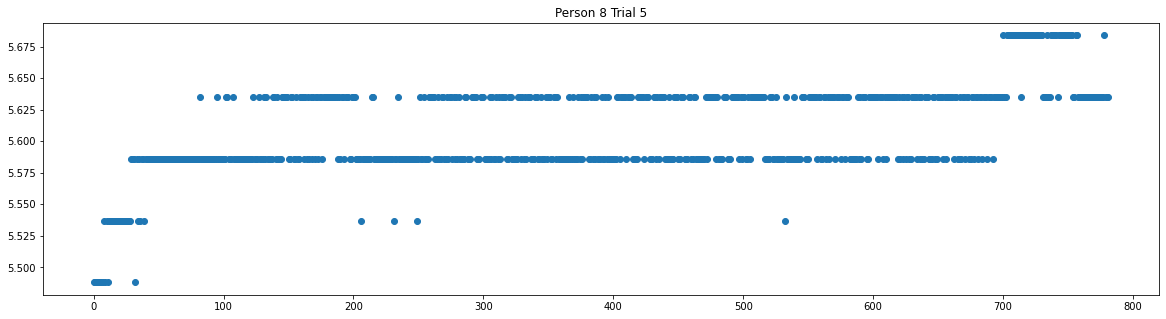

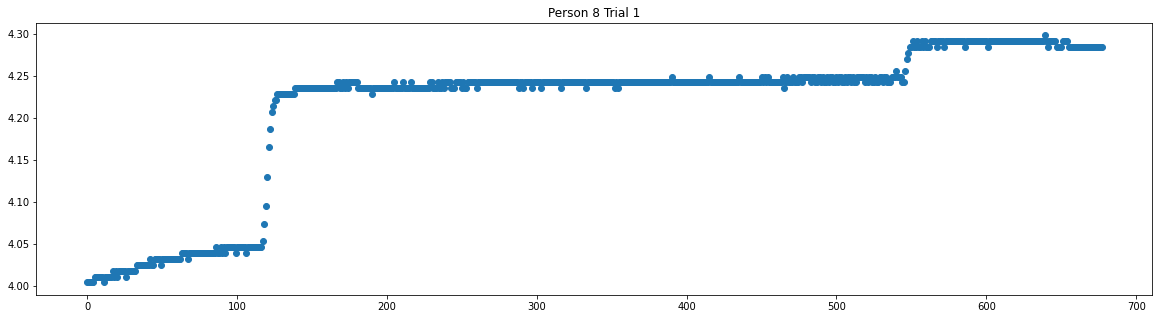

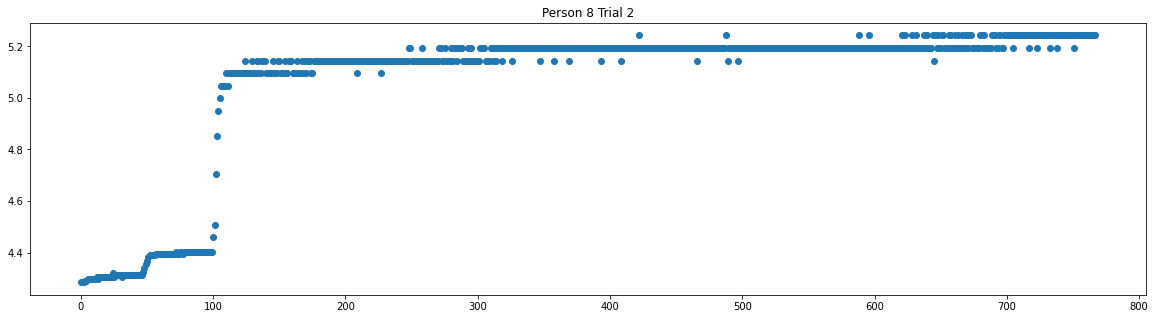

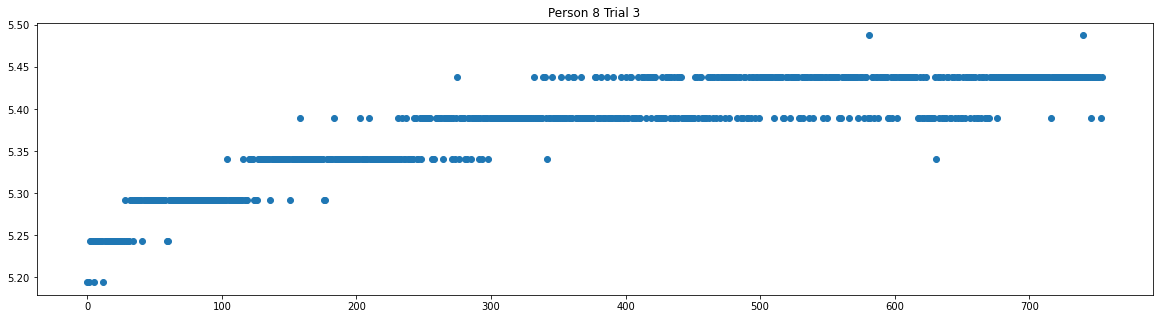

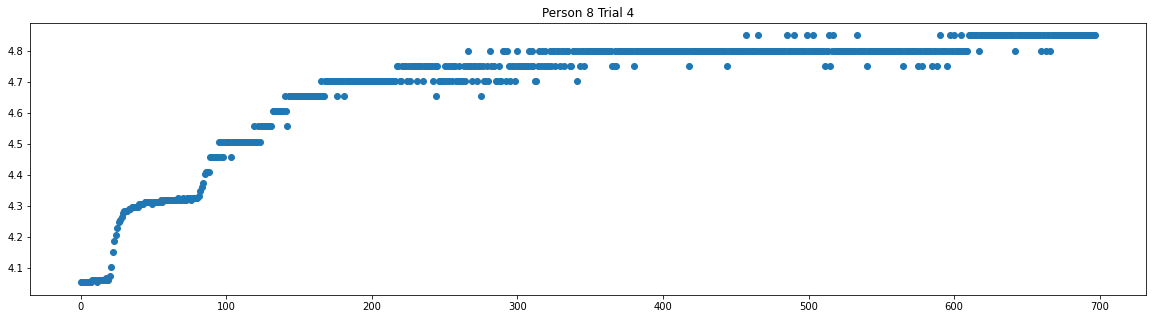

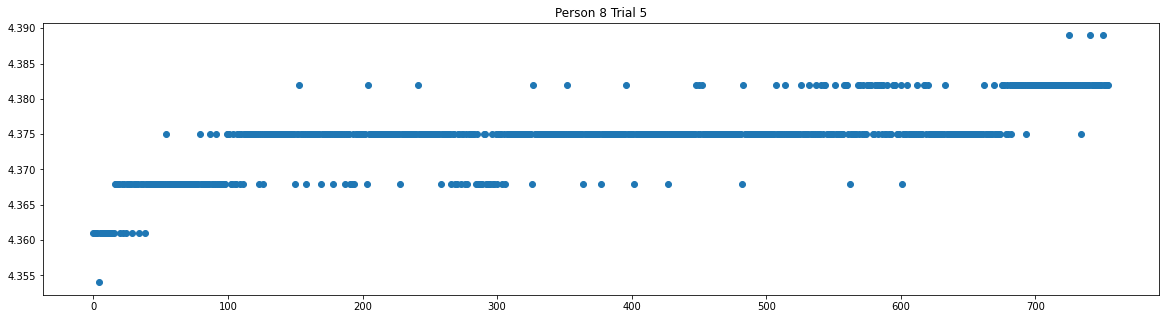

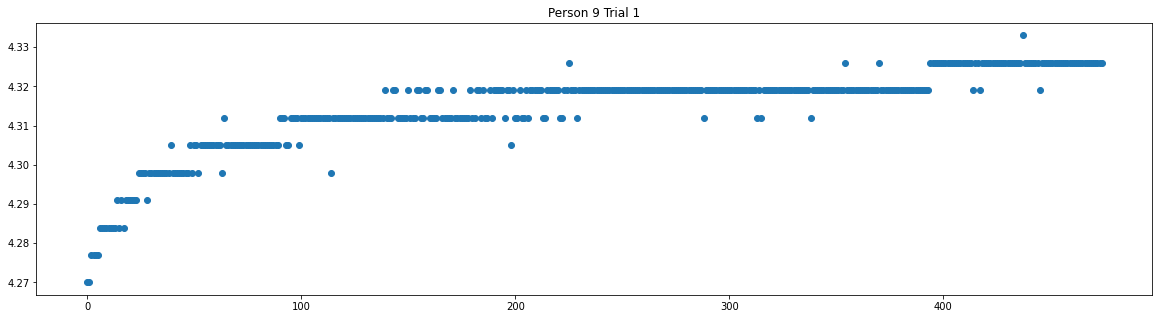

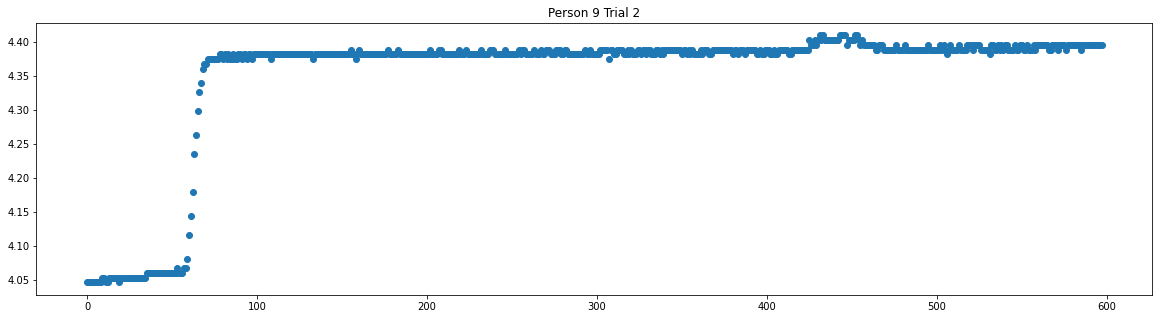

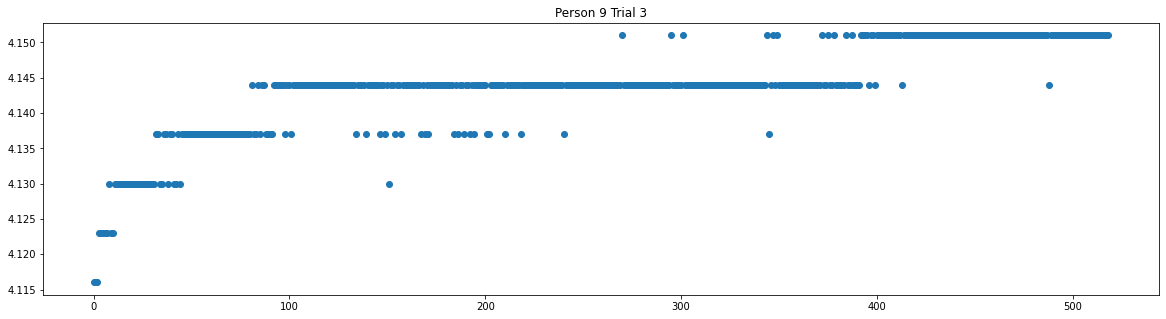

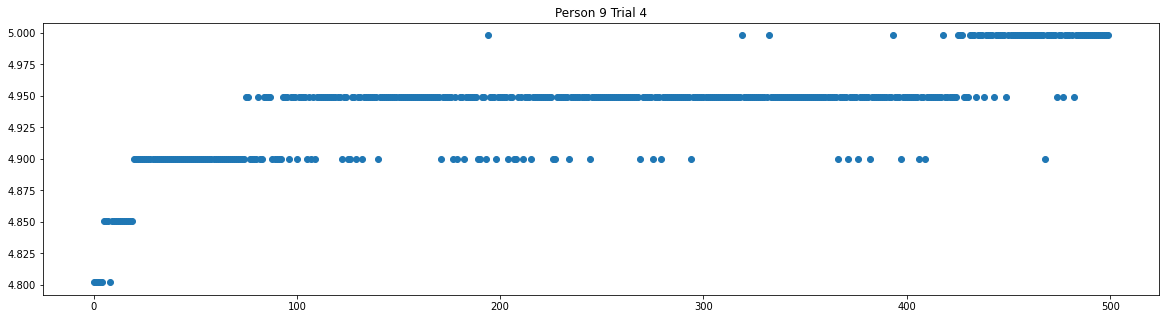

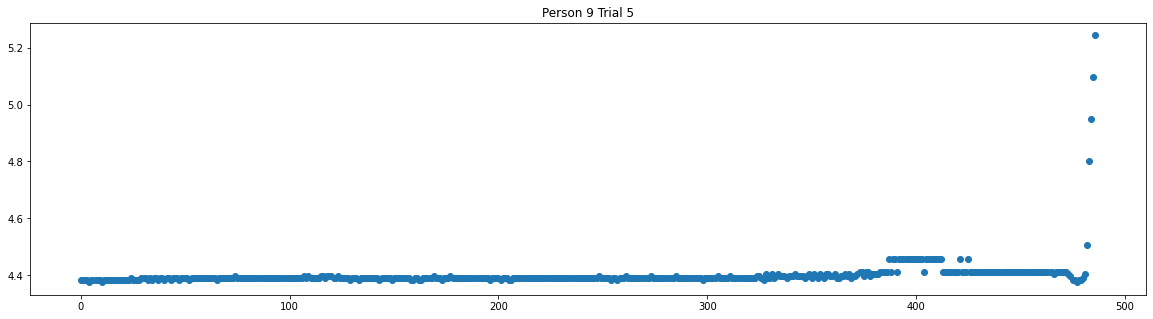

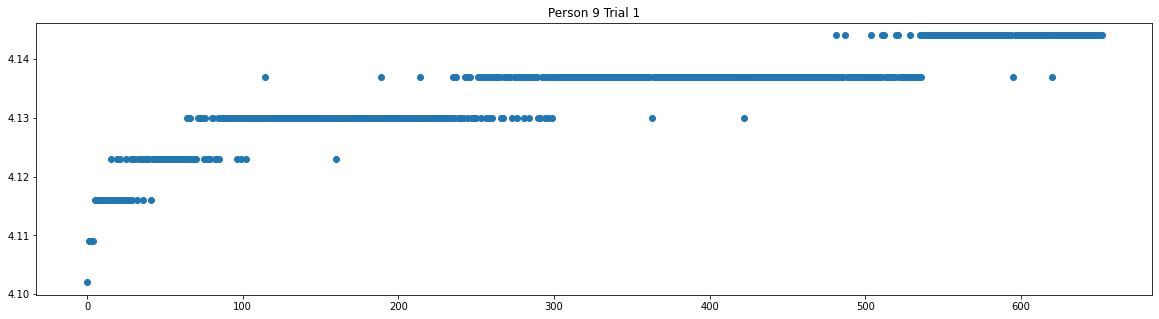

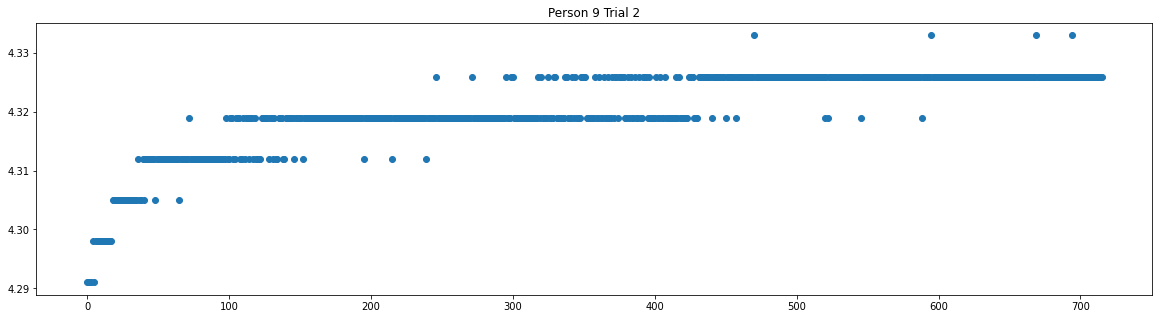

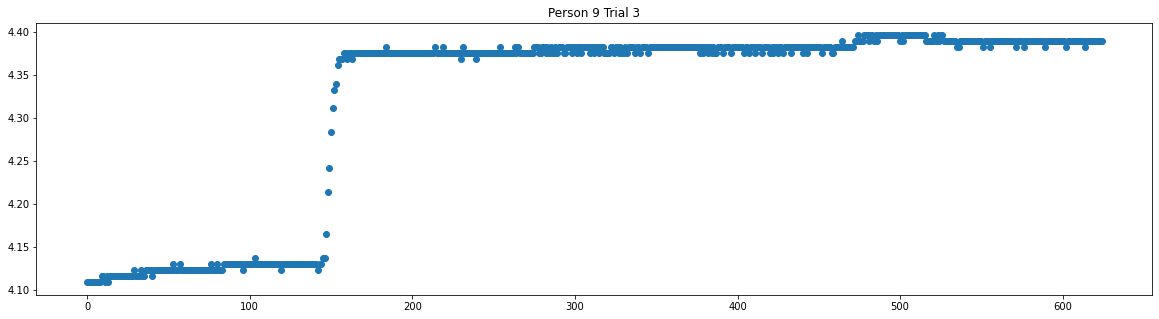

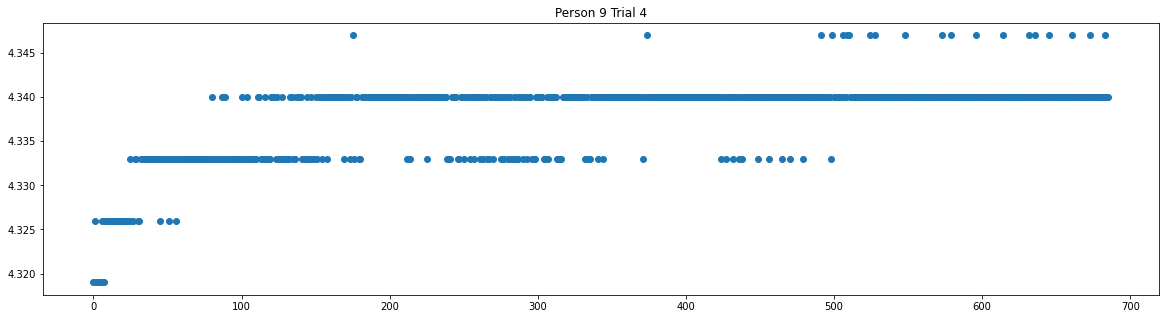

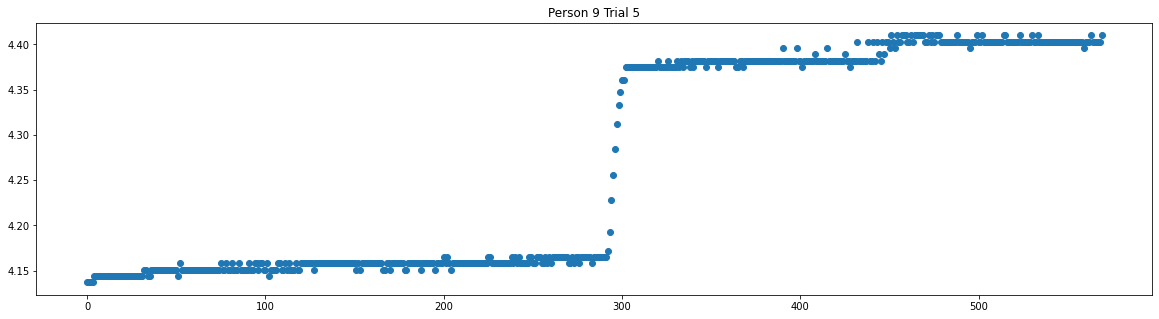

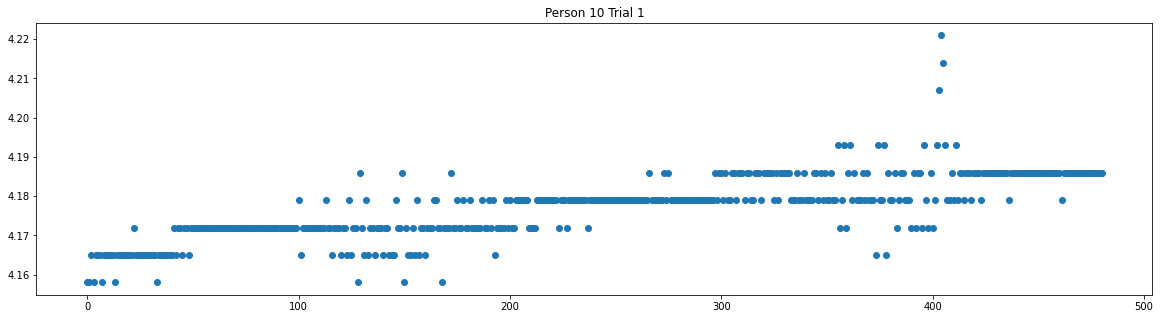

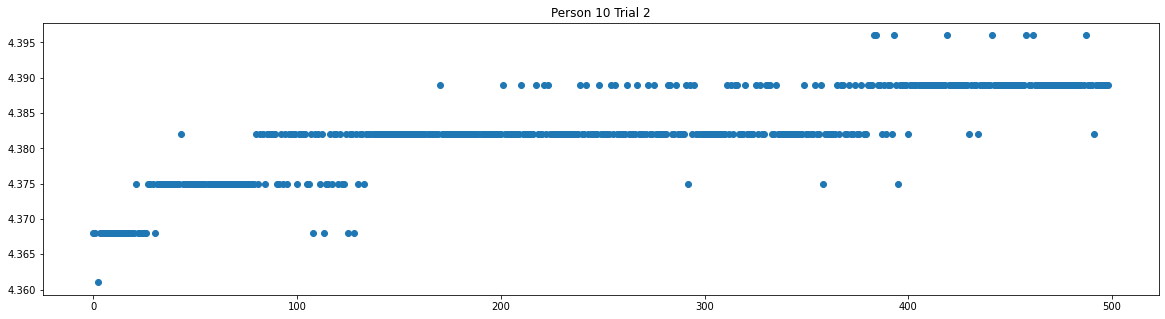

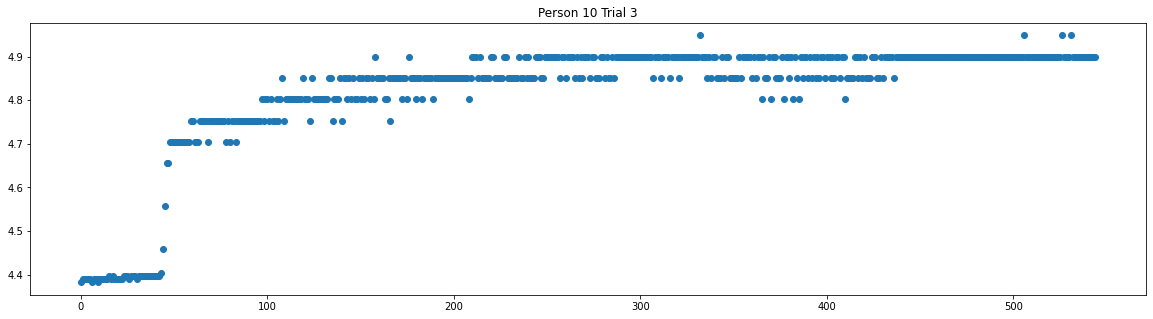

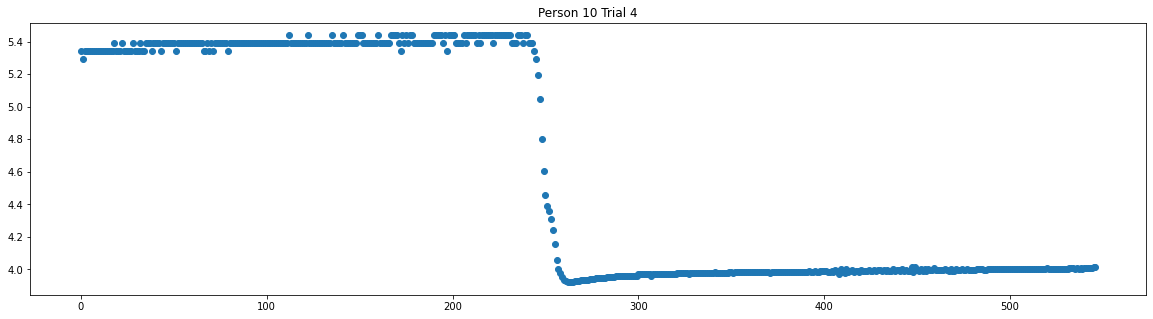

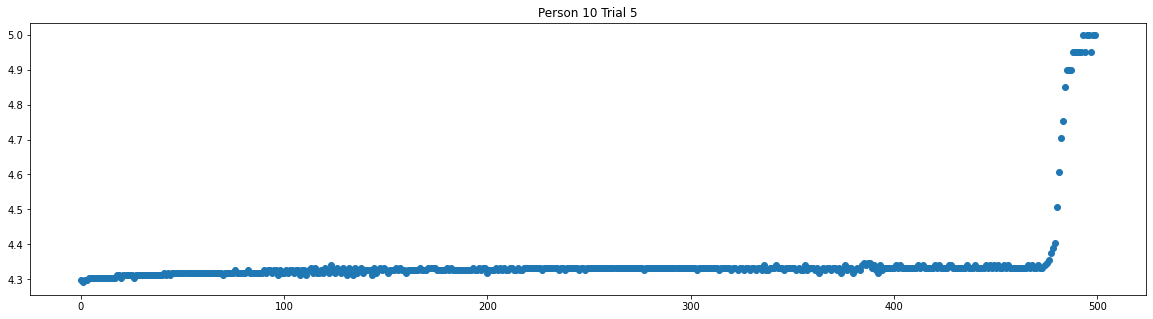

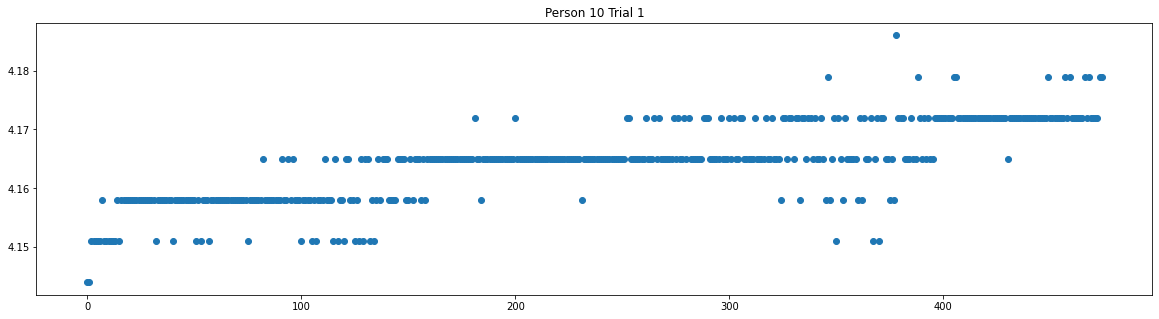

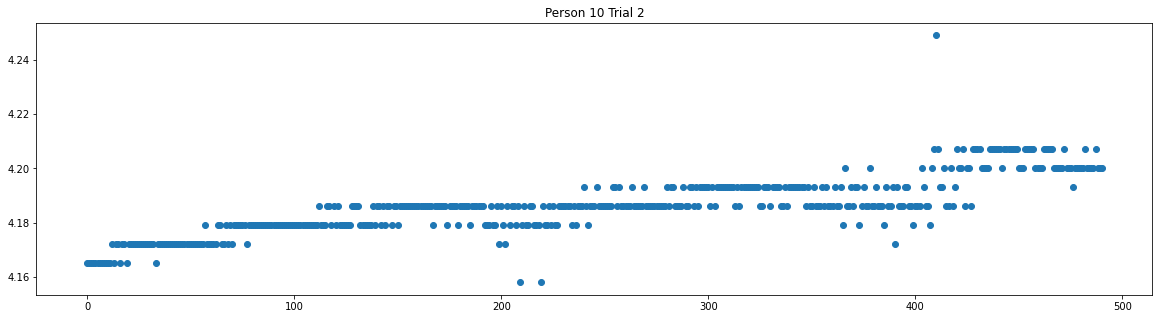

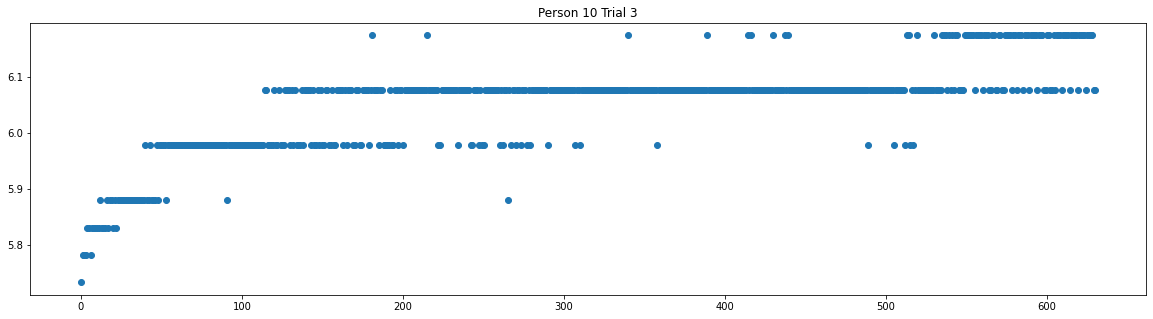

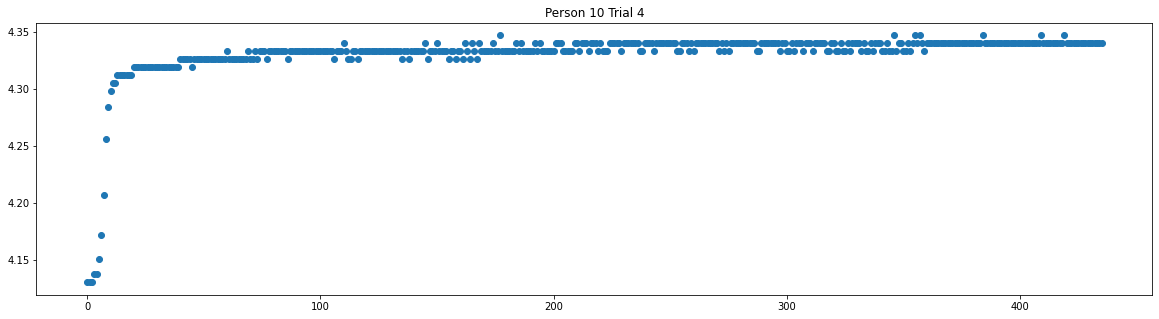

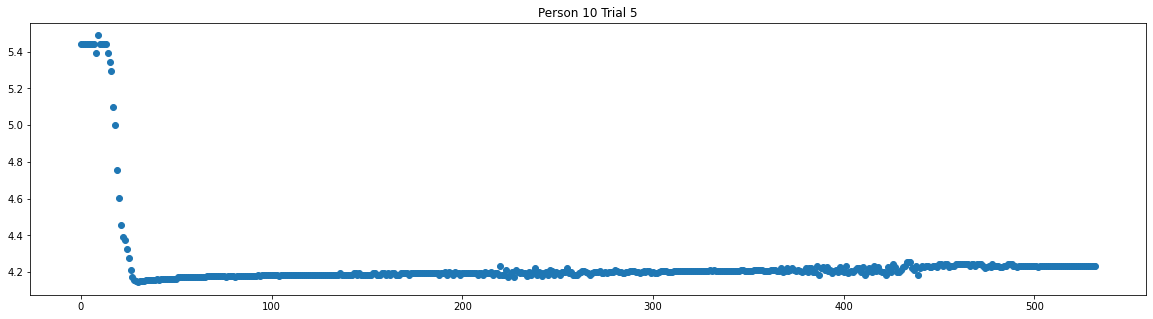

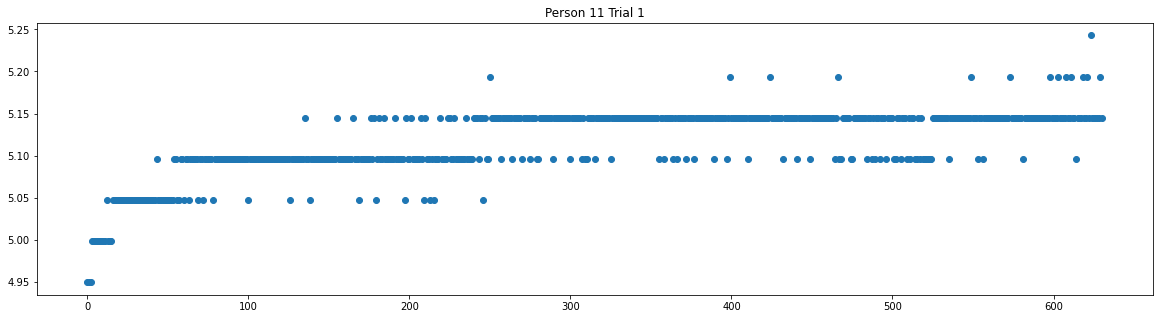

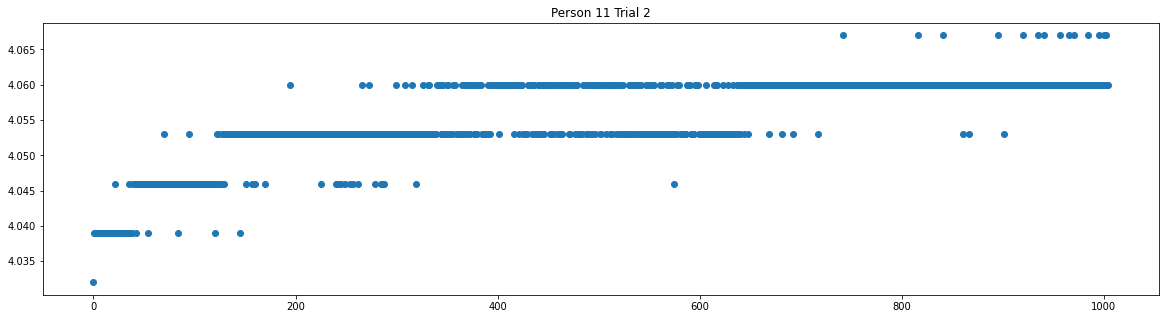

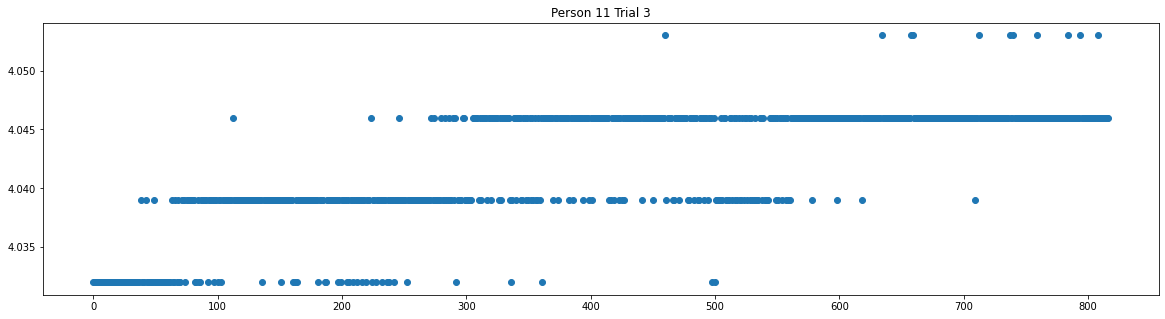

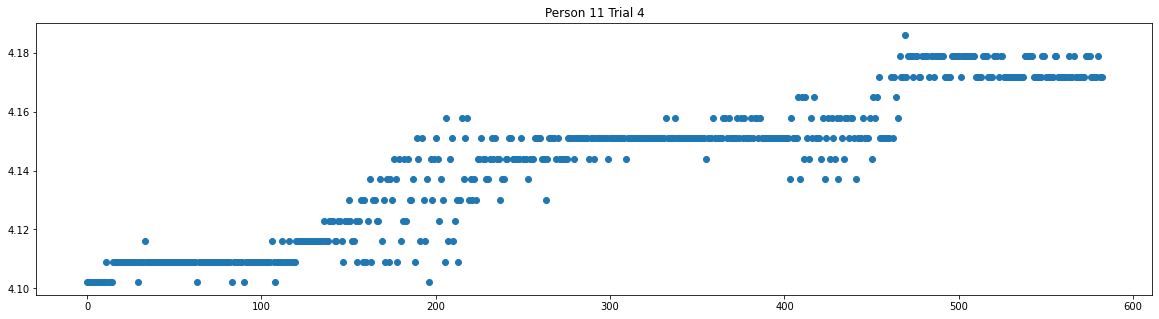

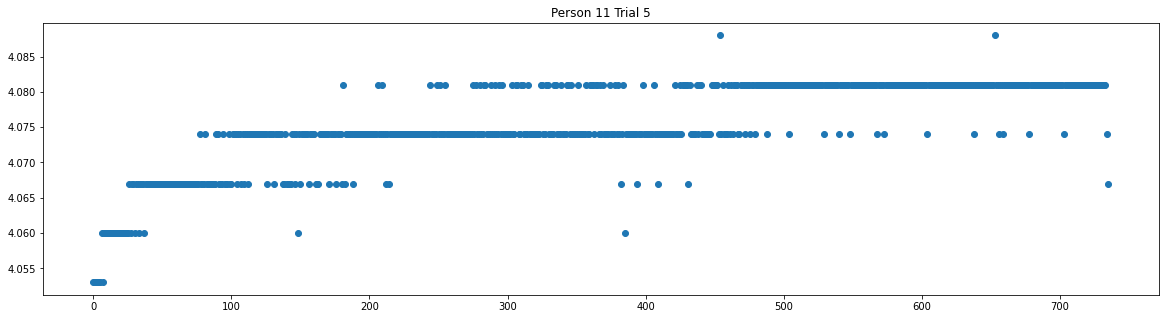

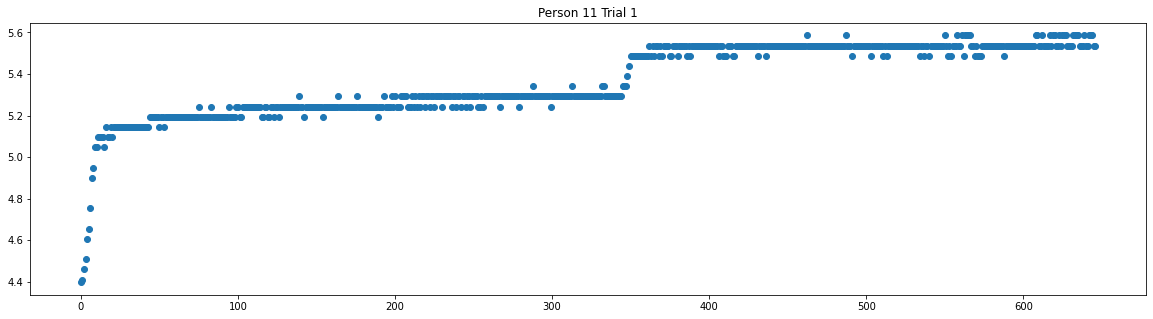

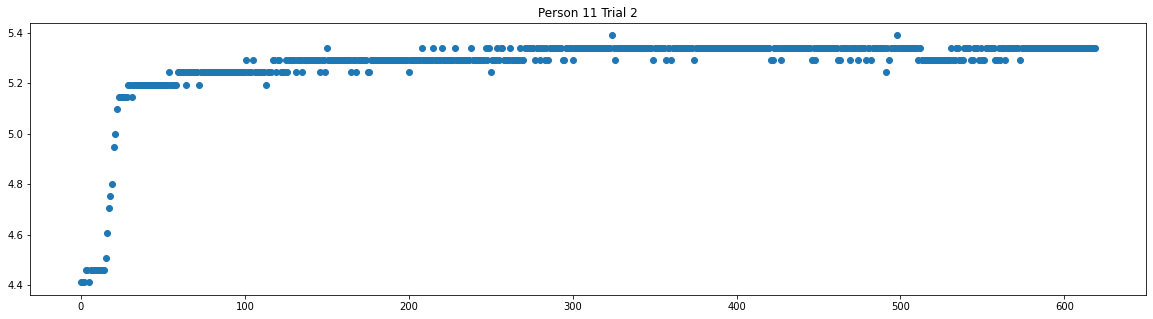

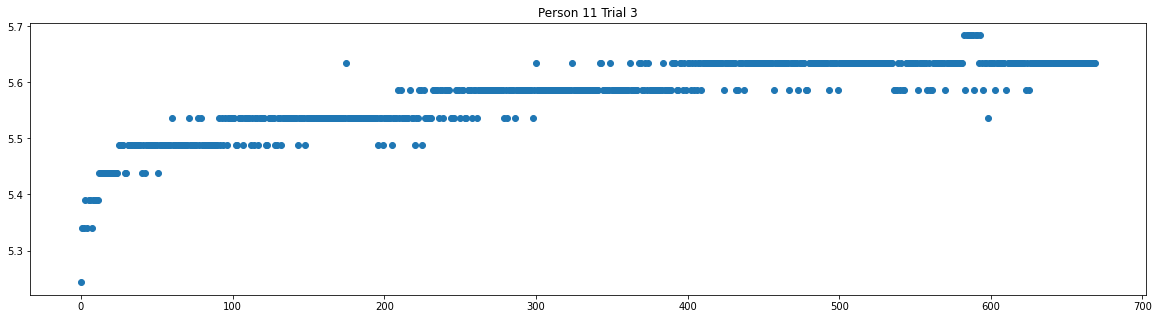

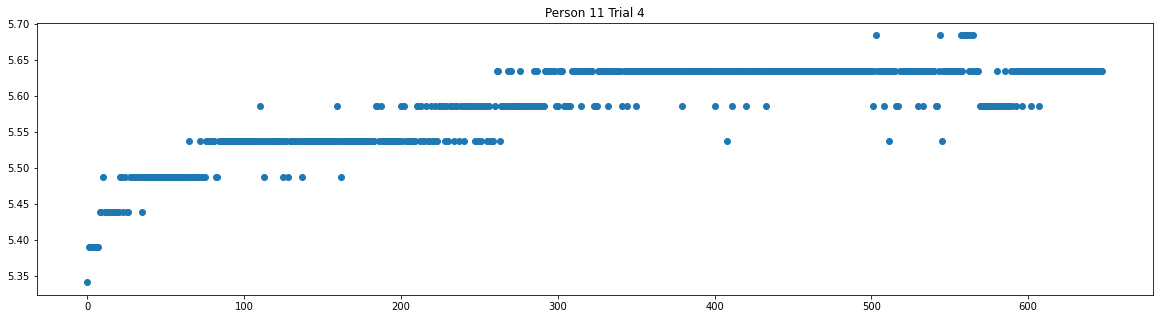

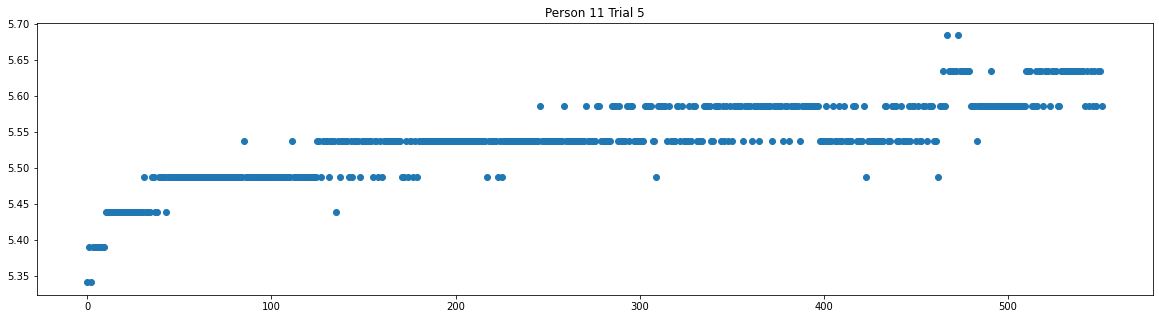

In [4]:
for category, data in experiments.items():
    plt.figure(figsize=(20,5))
    plt.scatter(data.index, data["force"])
    plt.title(f"Person {category[0]} Trial {category[2]}")
    plt.show()

In [5]:
experiments[(1,1,1)]

,force
0,4.144
1,4.144
2,4.144
3,4.144
4,4.144
...,...
1155,5.292
1156,5.292
1157,5.292
1158,5.292


In [6]:
l = []
for category, data in experiments.items(): 
    mean_force = data['force'].mean()
    l.append({"subject": category[0], "subtask": category[1],"trial": category[2], "mean" : mean_force})
df = pd.DataFrame(l)

In [7]:
df

,subject,subtask,trial,mean
0,1,1,1,4.517305
1,1,1,2,6.271470
2,1,1,3,4.458344
3,1,1,4,6.502689
4,1,1,5,6.569709
...,...,...,...,...
105,11,2,1,5.367713
106,11,2,2,5.277221
107,11,2,3,5.576200
108,11,2,4,5.584185


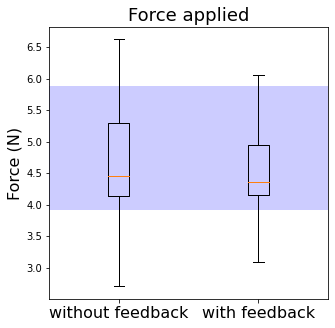

In [8]:
without_feedback = df.loc[df["subtask"] == 1, "mean"]
with_feedback = df.loc[df["subtask"] == 2, "mean"]

plt.figure(figsize=(5, 5))
plt.boxplot([without_feedback, with_feedback], labels=['without feedback', 'with feedback'])

plt.title('Force applied', fontsize="18")
plt.ylabel('Force (N)', fontsize="16")
plt.xticks(fontsize=16) 
plt.axhspan(3.92, 5.88, facecolor='blue', alpha=0.2)
plt.show()

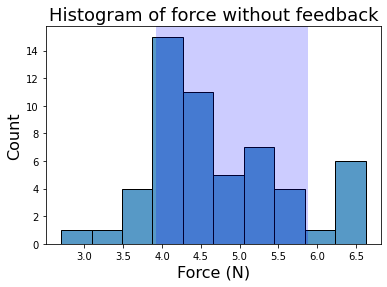

In [9]:
#Histogram without feedback
sns.histplot(without_feedback, bins=10)
plt.title('Histogram of force without feedback', fontsize="18")
plt.xlabel('Force (N)', fontsize="16")
plt.ylabel('Count', fontsize="16")
plt.axvspan(3.92, 5.88, facecolor='blue', alpha=0.2)
plt.show()

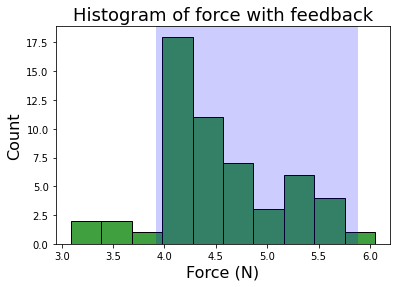

In [17]:
#Histogram with feedback
sns.histplot(with_feedback, bins=10, color='green')
plt.title('Histogram of force with feedback', fontsize="18")
plt.xlabel('Force (N)', fontsize="16")
plt.ylabel('Count', fontsize="16")
plt.axvspan(3.92, 5.88, facecolor='blue', alpha=0.2)
plt.show()

# Analysis of results

In [19]:
lw = len(with_feedback)
lw_in = ((with_feedback > 3.92) & (with_feedback < 5.88)).sum()
force_range_with = lw_in/lw
llw = (with_feedback < 5.88).sum()
force_range_without = lw_in/lw
above_with = 1 - llw/lw

print(f" Amount of time between the range with feedback: {force_range_with}")
print(f" Amount of time above the range without feedback: {above_with}")

 Amount of time between the range with feedback: 0.8909090909090909
 Amount of time above the range without feedback: 0.018181818181818188


In [12]:
lwo = len(without_feedback)
lwo_in = ((without_feedback > 3.92) & (without_feedback < 5.88)).sum()
lll = (without_feedback < 5.88).sum()
force_range_without = lwo_in/lwo
above = 1 - lll/lwo

print(f" Amount of time between the range without feedback: {force_range_without}")
print(f" Amount of time above the range without feedback: {above}")

 Amount of time between the range without feedback: 0.7636363636363637
 Amount of time above the range without feedback: 0.12727272727272732


In [13]:
with_feedback_iqr = with_feedback.quantile(0.75) - with_feedback.quantile(0.25)
without_feedback_iqr = without_feedback.quantile(0.75) - without_feedback.quantile(0.25)
difference = without_feedback_iqr / with_feedback_iqr

print(f" Difference of inter-quartile range: {difference}")

 Difference of inter-quartile range: 1.4520095728336089


# Data analysis

In [14]:
statistic, p_value = scipy.stats.shapiro(without_feedback)

# Output the results
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Statistic: 0.9471563696861267
P-value: 0.017256611958146095
The data does not appear to be normally distributed (reject H0)


In [15]:
statistic, p_value = scipy.stats.shapiro(with_feedback)

# Output the results
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Statistic: 0.9557542204856873
P-value: 0.04153047129511833
The data does not appear to be normally distributed (reject H0)


In [16]:
statistic, p_value = scipy.stats.mannwhitneyu(without_feedback, with_feedback)

# Output the results
print(f"Mann-Whitney U Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("There is no statistically significant difference between the two groups (fail to reject H0)")
else:
    print("There is a statistically significant difference between the two groups (reject H0)")

Mann-Whitney U Statistic: 1674.0
P-value: 0.3358078701664683
There is no statistically significant difference between the two groups (fail to reject H0)
